# WowSo Twitter Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from pprint import pprint
import time
start_time = time.time()

# plt.style.use("seaborn-whitegrid")
# sns.set_style("darkgrid")
# sns.set_context("poster")

# plt.rcParams["figure.figsize"] = (10, 6)

# pd.set_option('display.max_rows', 10)
# pd.set_option('display.max_columns', 100)
# pd.set_option('display.float_format', '{:.3f}'.format)

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [2]:
%%time
data = pd.read_csv("tweet_data.csv")
data.head(3)

CPU times: total: 12.3 s
Wall time: 14.9 s


,tweetID,crDate,edInput,editor,engages,isApproved,isEdNeed,isRT,likes,photoUrl,retweets,rtUsID,text,topicName,usFlwrs,usID,usName,videoUrl
0,1070867471245164544,2018-12-07 02:27:55,-1,-1,98,False,True,False,64,https://pbs.twimg.com/media/Dtx8SiIWkAImVsb.jpg,34,-1,The immediate impulse for an alliance of the E...,Business,23464532,5988062,The Economist,NaN
1,1070868017888837633,2018-12-07 02:30:05,-1,-1,13,False,True,False,10,https://pbs.twimg.com/media/Dtx8yTyW4AEciqP.jpg,3,-1,America's economy is flashing some warning sig...,Business,1732809,16184358,CNN Business,NaN
2,1070868012864028673,2018-12-07 02:30:04,-1,-1,12,False,True,False,8,NaN,4,-1,Lyft files for what is expected to be one of t...,Business,2253989,25053299,FORTUNE,NaN


In [3]:
data.shape

(785916, 18)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785916 entries, 0 to 785915
Data columns (total 18 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   tweetID     785916 non-null  int64 
 1   crDate      785916 non-null  object
 2   edInput     785916 non-null  int64 
 3   editor      785916 non-null  int64 
 4   engages     785916 non-null  int64 
 5   isApproved  785916 non-null  bool  
 6   isEdNeed    785916 non-null  bool  
 7   isRT        785916 non-null  bool  
 8   likes       785916 non-null  int64 
 9   photoUrl    277896 non-null  object
 10  retweets    785916 non-null  int64 
 11  rtUsID      785916 non-null  int64 
 12  text        785916 non-null  object
 13  topicName   785916 non-null  object
 14  usFlwrs     785916 non-null  int64 
 15  usID        785916 non-null  int64 
 16  usName      785916 non-null  object
 17  videoUrl    140491 non-null  object
dtypes: bool(3), int64(9), object(6)
memory usage: 92.2+ MB


In [5]:
data.topicName.value_counts()

Business                    164602
News                        131973
Motivational                 84750
Technology                   47679
Design & Architecture        44987
Cryptocurrency               38623
Art                          36697
Interesting                  28615
Animal                       28202
Memes                        26349
Nature                       25021
Photography                  23638
DIY & Craft                  22392
Space                        14226
Funny                        13654
Travel                       13215
Random                       11825
Editorial Pics               11026
Flowers                       9450
Mindfulness                   2779
Fitness                       2454
Nanotech                       792
World Leaders                  663
Psychology                     544
US News                        279
science                        244
Stocks                         188
Humor                          154
Spirituality        

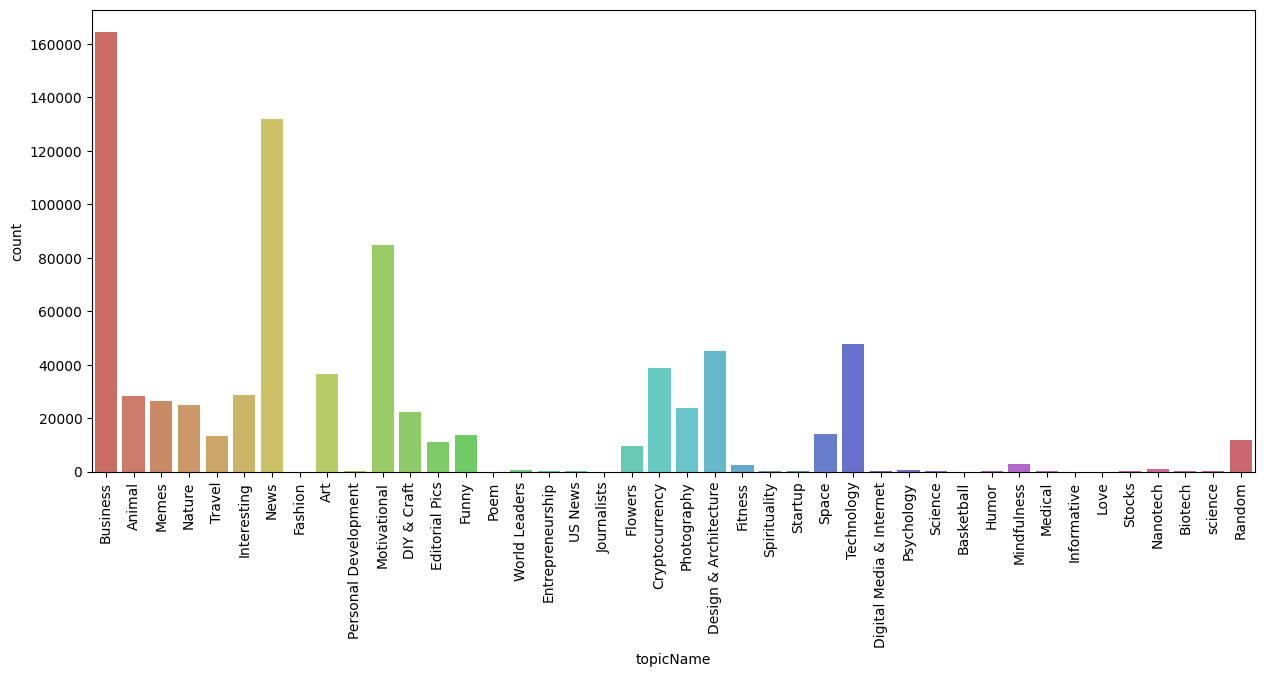

In [6]:
plt.figure(figsize= (15,6))
sns.countplot(x= data.topicName, data = data, palette = 'hls')
plt.xticks(rotation= 90) 
plt.show()

In [7]:
data.edInput.value_counts()

-1    422665
 1    215577
 2    106741
 4     32733
 3      8200
Name: edInput, dtype: int64

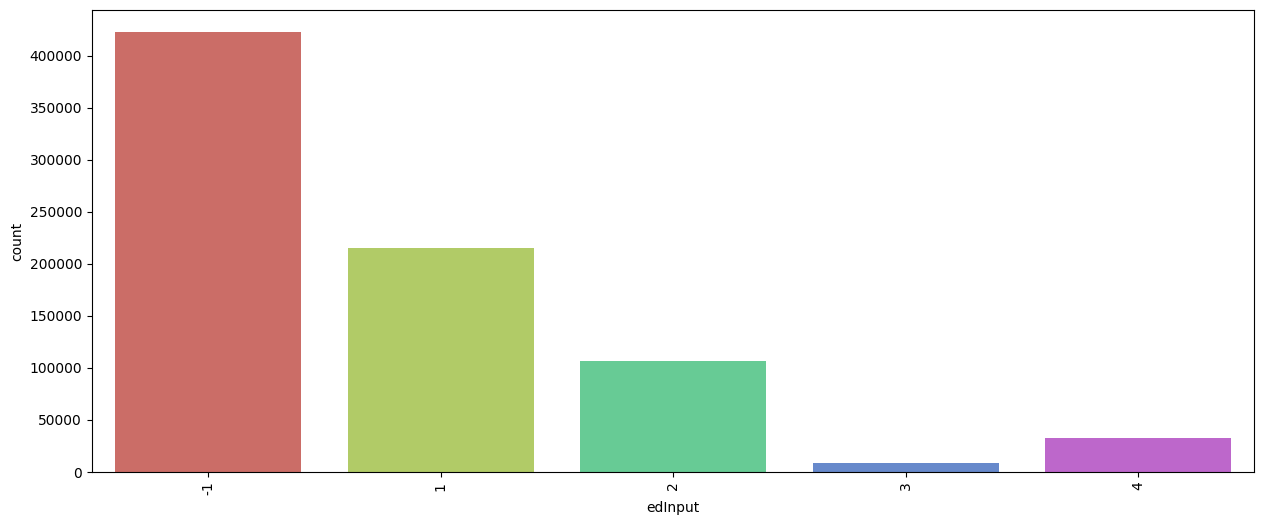

In [8]:
plt.figure(figsize= (15,6))
sns.countplot(x="edInput", data = data, palette = 'hls')
plt.xticks(rotation= 90) 
plt.show()

In [9]:
# -1 means, this twit is not labeled yet. 
# 1 means the classification is True.
# 2 means the classification is False.
# 3 means the classification is indecisive(uncertain).
# 4 means the classification is dublicated data.

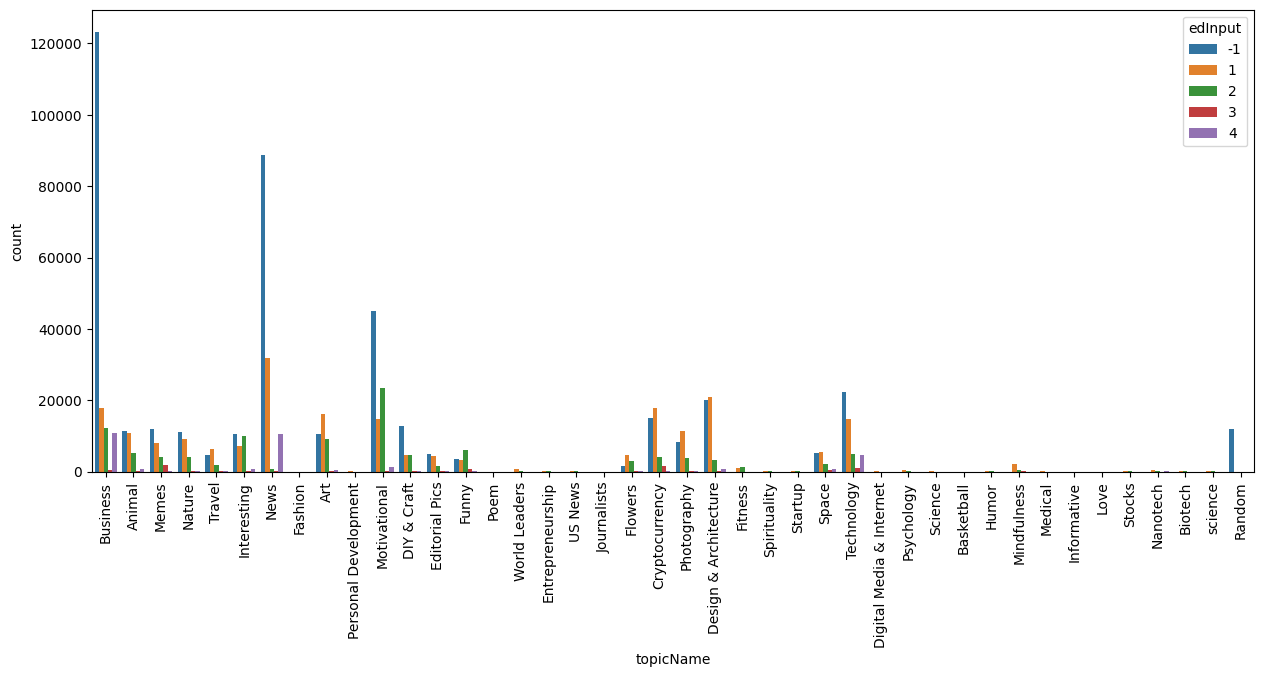

In [10]:
plt.figure(figsize= (15,6))
sns.countplot(data=data, x="topicName", hue="edInput")
plt.xticks(rotation= 90) 
plt.show()

In [11]:
data[data.topicName =="Business"].edInput.value_counts()


-1    123309
 1     17836
 2     12188
 4     10721
 3       548
Name: edInput, dtype: int64

In [12]:
# We will use the data of the Business category detected as true and false to use in the model

df = data[(data.topicName =="Business") & ((data.edInput == 1) | (data.edInput == 2))]
df.head()

,tweetID,crDate,edInput,editor,engages,isApproved,isEdNeed,isRT,likes,photoUrl,retweets,rtUsID,text,topicName,usFlwrs,usID,usName,videoUrl
12252,1072758722315862021,2018-12-12 07:43:04,2,5001,9618,False,True,True,5771,NaN,3847,621523,UK Prime Minister Theresa May will face a vote...,Business,38564612,5402612,BBC Breaking News,NaN
14042,1072959907958276096,2018-12-12 21:02:31,2,5001,10388,False,True,True,6977,https://pbs.twimg.com/media/DuPrWYHW4AEXol3.jpg,3411,621523,UK PM Theresa May wins confidence vote with 20...,Business,38567131,5402612,BBC Breaking News,NaN
16954,1073329348755767303,2018-12-13 21:30:32,2,5001,6734,False,True,True,4467,NaN,2267,3108351,The probe of the inaugural fund partly arises ...,Business,57108,705706292,Rebecca Ballhaus,NaN
18004,1073499538659393536,2018-12-14 08:46:49,1,5001,6914,True,True,True,5402,NaN,1512,621523,The week Brexit hit the brick wall : Commons ...,Business,879928,25984418,Nick Robinson,NaN
18396,1073542862573371392,2018-12-14 11:38:58,2,5001,6269,False,True,True,4610,NaN,1659,621523,Have watched these kinds of pictures looking f...,Business,888862,61183568,Laura Kuenssberg,https://video.twimg.com/ext_tw_video/107354281...


In [13]:
df = df[["edInput", "text"]].reset_index()

# df.to_csv("df_business.csv")

df

,index,edInput,text
0,12252,2,UK Prime Minister Theresa May will face a vote...
1,14042,2,UK PM Theresa May wins confidence vote with 20...
2,16954,2,The probe of the inaugural fund partly arises ...
3,18004,1,The week Brexit hit the brick wall : Commons ...
4,18396,2,Have watched these kinds of pictures looking f...
...,...,...,...
30019,785779,2,This bouquet of roses is completely edible htt...
30020,785809,2,This fancy McDonald's has a handwashing statio...
30021,785813,2,🚨 Spoilers ahead 🚨\nFinished #StrangerThings? ...
30022,785829,2,These cakes are topped with yogurt 🎂 https://t...


In [14]:
# 1 means the classification is True.
# 2 means the classification is False.
# We are converting "2" to "0" for False datas

# df.edInput = df.edInput.map({2:0, 1:1})
df.edInput = [0 if each == 2 else 1 for each in df.edInput]
df

,index,edInput,text
0,12252,0,UK Prime Minister Theresa May will face a vote...
1,14042,0,UK PM Theresa May wins confidence vote with 20...
2,16954,0,The probe of the inaugural fund partly arises ...
3,18004,1,The week Brexit hit the brick wall : Commons ...
4,18396,0,Have watched these kinds of pictures looking f...
...,...,...,...
30019,785779,0,This bouquet of roses is completely edible htt...
30020,785809,0,This fancy McDonald's has a handwashing statio...
30021,785813,0,🚨 Spoilers ahead 🚨\nFinished #StrangerThings? ...
30022,785829,0,These cakes are topped with yogurt 🎂 https://t...


## Cleaning Data

In [15]:
#!pip install re
import re

In [16]:

text = df.text[30021]
text

"🚨 Spoilers ahead 🚨\nFinished #StrangerThings? Great! Let's dive into some of the best details and callbacks woven into this season https://t.co/Saryb3VxZf"

In [17]:
text = re.sub("http\S+\s*", " ", text) # remove URLs
# text = text.replace("'", "")
text = re.sub("[']", " ", text)
text = re.sub("[^a-zA-Z]", " ", text).lower()   # remove all characters except uppercase and lowercase letters and convert all characters lowercase.
text

'  spoilers ahead   finished  strangerthings  great  let s dive into some of the best details and callbacks woven into this season  '

In [18]:
import nltk 
from nltk.tokenize import word_tokenize

text = nltk.word_tokenize(text)
text  

['spoilers',
 'ahead',
 'finished',
 'strangerthings',
 'great',
 'let',
 's',
 'dive',
 'into',
 'some',
 'of',
 'the',
 'best',
 'details',
 'and',
 'callbacks',
 'woven',
 'into',
 'this',
 'season']

In [19]:
df["text_cleaned"] = df.text.apply(lambda x: re.sub("http\S+\s*", ' ', x))          # remove URLs
df.text_cleaned = df.text_cleaned.apply(lambda x: re.sub("[']", " ", x))             # converting reagents(likel can't) 
    
df.text_cleaned = df.text_cleaned.apply(lambda x: re.sub("[^a-zA-Z]", " ", x))      # remove all characters except uppercase and lowercase letters
print(df.text_cleaned[30021])
df

  Spoilers ahead   Finished  StrangerThings  Great  Let s dive into some of the best details and callbacks woven into this season  


,index,edInput,text,text_cleaned
0,12252,0,UK Prime Minister Theresa May will face a vote...,UK Prime Minister Theresa May will face a vote...
1,14042,0,UK PM Theresa May wins confidence vote with 20...,UK PM Theresa May wins confidence vote with ...
2,16954,0,The probe of the inaugural fund partly arises ...,The probe of the inaugural fund partly arises ...
3,18004,1,The week Brexit hit the brick wall : Commons ...,The week Brexit hit the brick wall Commons ...
4,18396,0,Have watched these kinds of pictures looking f...,Have watched these kinds of pictures looking f...
...,...,...,...,...
30019,785779,0,This bouquet of roses is completely edible htt...,This bouquet of roses is completely edible
30020,785809,0,This fancy McDonald's has a handwashing statio...,This fancy McDonald s has a handwashing statio...
30021,785813,0,🚨 Spoilers ahead 🚨\nFinished #StrangerThings? ...,Spoilers ahead Finished StrangerThings G...
30022,785829,0,These cakes are topped with yogurt 🎂 https://t...,These cakes are topped with yogurt


## Tokenization

In [20]:
# !pip install nltk
import nltk     # naturel language toolkit
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer
nltk.download("punkt")
nltk.download("stopwords")
from nltk.corpus import stopwords
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gakbulut\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gakbulut\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gakbulut\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [21]:
stop_words = stopwords.words('english')

In [22]:
def cleaning_till_tokenize(data):
   
    # data = data.apply(lambda x: re.sub("http\S+\s*", ' ', x))       # remove URLs
    # data = data.apply(lambda x: re.sub("[']", "", x))             # converting reagents(likel can't)   
    # data = data.apply(lambda x: re.sub("[^a-zA-Z]", " ", x))      # remove all characters except uppercase and lowercase letters
       
    #1. Tokenize
    text_tokens = word_tokenize(data.lower()) 
         
    #joining
    return " ".join(text_tokens)

In [23]:
def cleaning_till_punctuation(data):
       
    #1. Tokenize
    text_tokens = word_tokenize(data.lower())
        
    #2. Remove Puncs
    tokens_without_punc = [w for w in text_tokens if w.isalpha()] 
             
    #joining
    return " ".join(tokens_without_punc)

In [24]:
def cleaning_till_stopword(data):
       
    #1. Tokenize
    text_tokens = word_tokenize(data.lower())
        
    #2. Remove Puncs
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]  
        
    #3. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]  
             
    #joining
    return " ".join(tokens_without_sw)

In [25]:
def cleaning_till_stemming(data):
       
    #1. Tokenize
    text_tokens = word_tokenize(data.lower())
        
    #2. Remove Puncs
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]  
    
    #3. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]  
    
    # Stemming veya lemmatize den hangisini uygulayacağımıza karar verip onu uyguluyoruz. Biz burada stemming seçiyoruz.    
    #4.1 stemming
    text_cleaned = [PorterStemmer().stem(t) for t in tokens_without_sw]  
       
    #joining
    return " ".join(text_cleaned)

In [26]:
def cleaning_till_lemmazite(data):
       
    #1. Tokenize
    text_tokens = word_tokenize(data.lower())
        
    #2. Remove Puncs
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]  
        # punctuation ve no lardan kurtuluyoruz.
    
    #3. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]  
       
    #4.2 lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
                
    #joining
    return " ".join(text_cleaned)

In [27]:
# def cleaning(data):
       
#     #1. Tokenize
#     text_tokens = word_tokenize(data.replace("'", "").lower()) 
#         # ayraçları kaldırıyoruz ki (can't gibi) olumsuzluk içeren kelimeler içinde ayraç içerdiği için stopwords lerde silinmesin.
#         # Yorumun olumsuz haliyle de olsa kalması için ilave bir yöntem olarak kullanıldı.
        
#     #2. Remove Puncs
#     tokens_without_punc = [w for w in text_tokens if w.isalpha()]  
#         # punctuation ve no lardan kurtuluyoruz.
    
#     #3. Removing Stopwords
#     tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]  # stopword lerden temizleme
#         # tokenleri teker teker al stopwords ler içinde yoksa olduğu gibi yaz, yani stopwords ise yazma.
#         # storwards olmayanları liste içine yazmaya devam et   
    
#     # Stemming veya lemmatize den hangisini uygulayacağımıza karar verip onu uyguluyoruz. Biz burada stemming seçiyoruz.    
#     #4.1 stemming
#     text_cleaned = [PorterStemmer().stem(t) for t in tokens_without_sw]
#         # stopwardslardan temizlenmiş tokenleri alıyoruz ve stem uyguluyoruz.
    
#     # #4.2 lemma
#     # text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
#     #     # stopwardslardan temizlenmiş tokenleri alıyoruz ve lemma uyguluyoruz.
        
#     #joining
#     return " ".join(text_cleaned)
#         # tamamen temizlenmiş ve köklerine inilmiş kelimeleri alıp join yapıyoruz.

In [28]:
df.text_cleaned = df.text_cleaned.apply(cleaning_till_tokenize)
# df.text_cleaned = df.text_cleaned.apply(cleaning_till_punctuation)
# df.text_cleaned = df.text_cleaned.apply(cleaning_till_stopword)
# df.text_cleaned = df.text_cleaned.apply(cleaning_till_stemming)
# df.text_cleaned = df.text_cleaned.apply(cleaning_till_lemmazite)
# df.text_cleaned = df.text_cleaned.apply(cleaning)
print(df.text_cleaned[30021])
df

spoilers ahead finished strangerthings great let s dive into some of the best details and callbacks woven into this season


,index,edInput,text,text_cleaned
0,12252,0,UK Prime Minister Theresa May will face a vote...,uk prime minister theresa may will face a vote...
1,14042,0,UK PM Theresa May wins confidence vote with 20...,uk pm theresa may wins confidence vote with ou...
2,16954,0,The probe of the inaugural fund partly arises ...,the probe of the inaugural fund partly arises ...
3,18004,1,The week Brexit hit the brick wall : Commons ...,the week brexit hit the brick wall commons won...
4,18396,0,Have watched these kinds of pictures looking f...,have watched these kinds of pictures looking f...
...,...,...,...,...
30019,785779,0,This bouquet of roses is completely edible htt...,this bouquet of roses is completely edible
30020,785809,0,This fancy McDonald's has a handwashing statio...,this fancy mcdonald s has a handwashing statio...
30021,785813,0,🚨 Spoilers ahead 🚨\nFinished #StrangerThings? ...,spoilers ahead finished strangerthings great l...
30022,785829,0,These cakes are topped with yogurt 🎂 https://t...,these cakes are topped with yogurt


In [29]:
# !pip install textblob
from textblob import TextBlob

# df['text_cleaned'][:10].apply(lambda x: str(TextBlob(x).correct()))

ss = df['text_cleaned'][30021]
print(ss)
pprint(TextBlob(ss).ngrams(1))

spoilers ahead finished strangerthings great let s dive into some of the best details and callbacks woven into this season
[WordList(['spoilers']),
 WordList(['ahead']),
 WordList(['finished']),
 WordList(['strangerthings']),
 WordList(['great']),
 WordList(['let']),
 WordList(['s']),
 WordList(['dive']),
 WordList(['into']),
 WordList(['some']),
 WordList(['of']),
 WordList(['the']),
 WordList(['best']),
 WordList(['details']),
 WordList(['and']),
 WordList(['callbacks']),
 WordList(['woven']),
 WordList(['into']),
 WordList(['this']),
 WordList(['season'])]


In [30]:
pprint(TextBlob(ss).ngrams(2))

[WordList(['spoilers', 'ahead']),
 WordList(['ahead', 'finished']),
 WordList(['finished', 'strangerthings']),
 WordList(['strangerthings', 'great']),
 WordList(['great', 'let']),
 WordList(['let', 's']),
 WordList(['s', 'dive']),
 WordList(['dive', 'into']),
 WordList(['into', 'some']),
 WordList(['some', 'of']),
 WordList(['of', 'the']),
 WordList(['the', 'best']),
 WordList(['best', 'details']),
 WordList(['details', 'and']),
 WordList(['and', 'callbacks']),
 WordList(['callbacks', 'woven']),
 WordList(['woven', 'into']),
 WordList(['into', 'this']),
 WordList(['this', 'season'])]


In [31]:
pprint(TextBlob(ss).ngrams(3))

[WordList(['spoilers', 'ahead', 'finished']),
 WordList(['ahead', 'finished', 'strangerthings']),
 WordList(['finished', 'strangerthings', 'great']),
 WordList(['strangerthings', 'great', 'let']),
 WordList(['great', 'let', 's']),
 WordList(['let', 's', 'dive']),
 WordList(['s', 'dive', 'into']),
 WordList(['dive', 'into', 'some']),
 WordList(['into', 'some', 'of']),
 WordList(['some', 'of', 'the']),
 WordList(['of', 'the', 'best']),
 WordList(['the', 'best', 'details']),
 WordList(['best', 'details', 'and']),
 WordList(['details', 'and', 'callbacks']),
 WordList(['and', 'callbacks', 'woven']),
 WordList(['callbacks', 'woven', 'into']),
 WordList(['woven', 'into', 'this']),
 WordList(['into', 'this', 'season'])]


In [32]:
pprint(TextBlob(ss).ngrams(4))

[WordList(['spoilers', 'ahead', 'finished', 'strangerthings']),
 WordList(['ahead', 'finished', 'strangerthings', 'great']),
 WordList(['finished', 'strangerthings', 'great', 'let']),
 WordList(['strangerthings', 'great', 'let', 's']),
 WordList(['great', 'let', 's', 'dive']),
 WordList(['let', 's', 'dive', 'into']),
 WordList(['s', 'dive', 'into', 'some']),
 WordList(['dive', 'into', 'some', 'of']),
 WordList(['into', 'some', 'of', 'the']),
 WordList(['some', 'of', 'the', 'best']),
 WordList(['of', 'the', 'best', 'details']),
 WordList(['the', 'best', 'details', 'and']),
 WordList(['best', 'details', 'and', 'callbacks']),
 WordList(['details', 'and', 'callbacks', 'woven']),
 WordList(['and', 'callbacks', 'woven', 'into']),
 WordList(['callbacks', 'woven', 'into', 'this']),
 WordList(['woven', 'into', 'this', 'season'])]


## Train Test Split

In [33]:
from sklearn.model_selection import train_test_split

X = df["text_cleaned"]
y = df["edInput"]

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

## Vectorization

### Bag of Words (Count Vectorization)

In [35]:
tweet_words = [df['text_cleaned'][30021]]
tweet_words

['spoilers ahead finished strangerthings great let s dive into some of the best details and callbacks woven into this season']

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
cv.fit(tweet_words)

print("Vocabulary size: {}".format(len(cv.vocabulary_)))
print("Vocabulary content:\n {}".format(cv.vocabulary_))

Vocabulary size: 18
Vocabulary content:
 {'spoilers': 13, 'ahead': 0, 'finished': 6, 'strangerthings': 14, 'great': 7, 'let': 9, 'dive': 5, 'into': 8, 'some': 12, 'of': 10, 'the': 15, 'best': 2, 'details': 4, 'and': 1, 'callbacks': 3, 'woven': 17, 'this': 16, 'season': 11}


In [37]:
bag_of_words = cv.transform(tweet_words)
print("bag_of_words: {}".format(repr(bag_of_words)))

bag_of_words: <1x18 sparse matrix of type '<class 'numpy.int64'>'
	with 18 stored elements in Compressed Sparse Row format>


In [38]:
print("Dense representation of bag_of_words:\n{}".format(bag_of_words.toarray()))

Dense representation of bag_of_words:
[[1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1]]


In [39]:
cv = CountVectorizer(ngram_range=(1, 1)).fit(tweet_words)
print("Vocabulary size: {}".format(len(cv.vocabulary_)))
print("Vocabulary:\n{}".format(cv.get_feature_names_out()))

Vocabulary size: 18
Vocabulary:
['ahead' 'and' 'best' 'callbacks' 'details' 'dive' 'finished' 'great'
 'into' 'let' 'of' 'season' 'some' 'spoilers' 'strangerthings' 'the'
 'this' 'woven']


In [40]:
cv = CountVectorizer(ngram_range=(2,2)).fit(tweet_words)
print("Vocabulary size: {}".format(len(cv.vocabulary_)))
print("Vocabulary:\n{}".format(cv.get_feature_names_out()))


Vocabulary size: 18
Vocabulary:
['ahead finished' 'and callbacks' 'best details' 'callbacks woven'
 'details and' 'dive into' 'finished strangerthings' 'great let'
 'into some' 'into this' 'let dive' 'of the' 'some of' 'spoilers ahead'
 'strangerthings great' 'the best' 'this season' 'woven into']


In [41]:
print("Transformed data (dense):\n{}".format(cv.transform(tweet_words).toarray()))


Transformed data (dense):
[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]


In [42]:
cv = CountVectorizer(ngram_range=(1, 3)).fit(tweet_words)
print("Vocabulary size: {}".format(len(cv.vocabulary_)))
print("Vocabulary:\n{}".format(cv.get_feature_names_out()))

Vocabulary size: 53
Vocabulary:
['ahead' 'ahead finished' 'ahead finished strangerthings' 'and'
 'and callbacks' 'and callbacks woven' 'best' 'best details'
 'best details and' 'callbacks' 'callbacks woven' 'callbacks woven into'
 'details' 'details and' 'details and callbacks' 'dive' 'dive into'
 'dive into some' 'finished' 'finished strangerthings'
 'finished strangerthings great' 'great' 'great let' 'great let dive'
 'into' 'into some' 'into some of' 'into this' 'into this season' 'let'
 'let dive' 'let dive into' 'of' 'of the' 'of the best' 'season' 'some'
 'some of' 'some of the' 'spoilers' 'spoilers ahead'
 'spoilers ahead finished' 'strangerthings' 'strangerthings great'
 'strangerthings great let' 'the' 'the best' 'the best details' 'this'
 'this season' 'woven' 'woven into' 'woven into this']


In [43]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [44]:
pipe = make_pipeline(CountVectorizer(), LogisticRegression())

param_grid = {"logisticregression__C": [0.001, 0.01, 0.1, 1, 10, 100],
 "countvectorizer__ngram_range": [(1, 1), (1, 2), (1, 3)]}

grid = RandomizedSearchCV(pipe, param_grid, cv=3)
grid.fit(X_train, y_train)

print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters:\n{}".format(grid.best_params_))

Best cross-validation score: 0.81
Best parameters:
{'logisticregression__C': 1, 'countvectorizer__ngram_range': (1, 3)}


In [45]:
pipe = make_pipeline(TfidfVectorizer(), LogisticRegression())

param_grid = {"logisticregression__C": [0.001, 0.01, 0.1, 1, 10, 100],
 "tfidfvectorizer__ngram_range": [(1, 1), (1, 2), (1, 3)]}

grid = RandomizedSearchCV(pipe, param_grid, cv=3)
grid.fit(X_train, y_train)

print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters:\n{}".format(grid.best_params_))

Best cross-validation score: 0.81
Best parameters:
{'tfidfvectorizer__ngram_range': (1, 2), 'logisticregression__C': 10}


### Bag of Words (Count Vectorization) for WHOLE DATASET

In [46]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

X_train_cv = cv.fit_transform(X_train)  
X_test_cv = cv.transform(X_test)

print("Original X_train   : ", X_train.shape)
print("Reshaped X_train_cv: ", X_train_cv.shape)
print("Original X_test    : ", X_test.shape)
print("Reshaped X_test_cv : ", X_test_cv.shape)

Original X_train   :  (24019,)
Reshaped X_train_cv:  (24019, 22022)
Original X_test    :  (6005,)
Reshaped X_test_cv :  (6005, 22022)


In [47]:
X_train_cv
print("X_train_cv:\n{}".format(repr(X_train_cv)))

X_train_cv:
<24019x22022 sparse matrix of type '<class 'numpy.int64'>'
	with 361062 stored elements in Compressed Sparse Row format>


In [48]:
feature_names = cv.get_feature_names_out()
print("Number of features: {}".format(len(feature_names)))
print("First 20 features:\n{}".format(feature_names[:20]))
print("Features 10010 to 10030:\n{}".format(feature_names[10010:10030]))
print("Number of features: {}".format(len(feature_names)))
print("Last 20 features:\n{}".format(feature_names[-20:]))
print("Every 2000th feature:\n{}".format(feature_names[::2000]))


Number of features: 22022
First 20 features:
['aabid' 'aahhh' 'aaja' 'aaker' 'aapl' 'aaron' 'aasugar' 'ab' 'ababa'
 'abace' 'abandon' 'abandoned' 'abandoning' 'abandons' 'abate' 'abating'
 'abbey' 'abbott' 'abbreviation' 'abbreviations']
Features 10010 to 10030:
['instrument' 'instrumental' 'insulation' 'insulin' 'insult' 'insulted'
 'insulting' 'insults' 'insurance' 'insured' 'insurer' 'insurers'
 'insurgencies' 'insuring' 'insurtech' 'insys' 'intact' 'intake'
 'integral' 'integrate']
Number of features: 22022
Last 20 features:
['zinedine' 'zinger' 'zion' 'zip' 'zombie' 'zone' 'zones' 'zoning' 'zoo'
 'zoom' 'zooming' 'zooms' 'zoox' 'zte' 'ztracer' 'zuck' 'zuckerberg'
 'zucman' 'zuma' 'zuzana']
Every 2000th feature:
['aabid' 'biz' 'condemning' 'droplet' 'gaggan' 'instinct' 'masculinity'
 'pains' 'refuse' 'sleepwalk' 'ton' 'zimbabwean']


In [49]:
type(X_train)

pandas.core.series.Series

In [50]:
len(X_train_cv.toarray())

24019

In [51]:
X_train_cv.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [52]:
pd.DataFrame(X_train_cv.toarray(), columns = cv.get_feature_names_out()) 

,aabid,aahhh,aaja,aaker,aapl,aaron,aasugar,ab,ababa,abace,...,zooming,zooms,zoox,zte,ztracer,zuck,zuckerberg,zucman,zuma,zuzana
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24014,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24016,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24017,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
X_train.tail()

247                             vanilla isn t easy to grow
24749    three chinese banks tumble after report on nor...
12119    a clear link between regular cannabis use and ...
27998    we compared apple and microsoft s flagship sto...
4399     a yale history professor explains why and the ...
Name: text_cleaned, dtype: object

In [54]:
# import libraries
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import f1_score

# train model with different n-gram ranges for ***BernoulliNB***
print("n-gram ranges for BernoulliNB")
print("-------------------------------")

for n in range(1,5):

    # convert training data to bag of words
    cv = CountVectorizer(analyzer = 'word',ngram_range=(n,n), stop_words='english')
    X_train_cv = cv.fit_transform(X_train)
    X_test_cv = cv.transform(X_test)
        
    # train model and generate predictions
    clf = BernoulliNB()
    clf.fit(X_train_cv, y_train)
    y_pred = clf.predict(X_test_cv)
        
    # compute f-1 score
    score = np.round(f1_score(y_test, y_pred, average='micro'),4)
        
    print('F-1 score of model with n-gram range of {}: {}'.format((n,n), score))
    
print(" ")  
print("n-gram ranges for MultinomialNB")
print("-------------------------------")
for n in range(1,5):
        
    # convert training data to bag of words
    cv = CountVectorizer(analyzer = 'word',ngram_range=(n,n), stop_words='english')
    X_train_cv = cv.fit_transform(X_train)
    X_test_cv = cv.transform(X_test)
        
    # train model and generate predictions
    clf = MultinomialNB()
    clf.fit(X_train_cv, y_train)
    y_pred = clf.predict(X_test_cv)
        
    # compute f-1 score
    score = np.round(f1_score(y_test, y_pred, average='micro'),4)
    
    print('F-1 score of model with n-gram range of {}: {}'.format((n,n), score))

n-gram ranges for BernoulliNB
-------------------------------
F-1 score of model with n-gram range of (1, 1): 0.8185
F-1 score of model with n-gram range of (2, 2): 0.6789
F-1 score of model with n-gram range of (3, 3): 0.6428
F-1 score of model with n-gram range of (4, 4): 0.6305
 
n-gram ranges for MultinomialNB
-------------------------------
F-1 score of model with n-gram range of (1, 1): 0.822
F-1 score of model with n-gram range of (2, 2): 0.7675
F-1 score of model with n-gram range of (3, 3): 0.7007
F-1 score of model with n-gram range of (4, 4): 0.6688


In [55]:
print(" ")  
print("n-gram ranges for MultinomialNB")
print("-------------------------------")
for n in range(1,11):
        
    # convert training data to bag of words
    cv = CountVectorizer(analyzer = 'word',ngram_range=(1,n), stop_words='english')
    X_train_cv = cv.fit_transform(X_train)
    X_test_cv = cv.transform(X_test)
        
    # train model and generate predictions
    clf = MultinomialNB()
    clf.fit(X_train_cv, y_train)
    y_pred = clf.predict(X_test_cv)
        
    # compute f-1 score
    score = np.round(f1_score(y_test, y_pred, average='micro'),4)
    
    print('F-1 score of model with n-gram range of {}: {}'.format((1,n), score))

 
n-gram ranges for MultinomialNB
-------------------------------
F-1 score of model with n-gram range of (1, 1): 0.822
F-1 score of model with n-gram range of (1, 2): 0.8276
F-1 score of model with n-gram range of (1, 3): 0.8243
F-1 score of model with n-gram range of (1, 4): 0.8228
F-1 score of model with n-gram range of (1, 5): 0.8218
F-1 score of model with n-gram range of (1, 6): 0.8218
F-1 score of model with n-gram range of (1, 7): 0.8218
F-1 score of model with n-gram range of (1, 8): 0.8211
F-1 score of model with n-gram range of (1, 9): 0.8213
F-1 score of model with n-gram range of (1, 10): 0.8211


In [56]:
# We found that the best F-1 score is MultinomialNB model for ngram_range=(1,2).
# However, since there is no significant difference between the values, we will use ngram_range(1,1) so that the size of the dataframe does not increase.

### TF-IDF Vectorization

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf_vectorizer = TfidfVectorizer()

X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

## Dimension Reduction -- Truncated SVD

In [58]:
# n_components değerini yüksek girdiğimizde memory hatası aldığımızdan sadece n_components = 100 için uyguladık.
# We have implemented just for n_components = 100 as we have taken memory error when we input height values.
# Since we got a memory error when we entered the height values, we only applied it for n_components = 100.

-------------------------------
Original shape: (24019, 939839)
Reduced shape: (24019, 100)
Original number of features: 939839
Reduced number of features: 100
-------------------------------
sum of explained_variance_ratio_:  0.0456


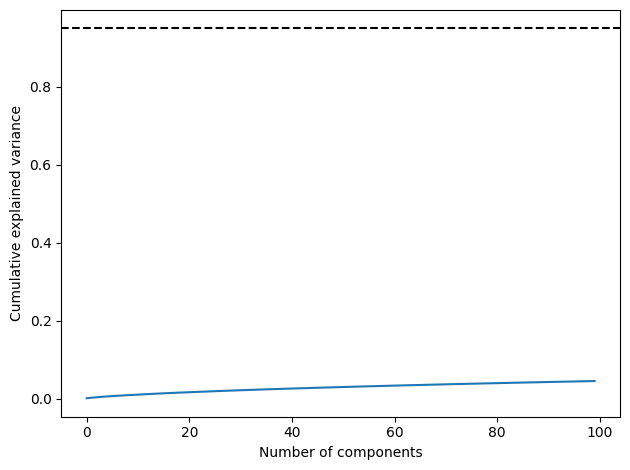

In [59]:
from sklearn.decomposition import TruncatedSVD

# specify the no of output features
tsvd = TruncatedSVD(n_components=100, random_state=42)
 
# apply the truncatedSVD function
# X_train_cv_tsvd = tsvd.fit(X_train_cv).transform(X_train_cv)
# tsvd = svd.fit(X_train_cv)
# X_train_cv_tsvd = tsvd.transform(X_train_cv)
X_train_cv_tsvd = tsvd.fit_transform(X_train_cv)

# pprint(X_train_cv_tsvd)
 
# shape of the reduced matrix
print("-------------------------------")
print("Original shape:", X_train_cv.shape)
print("Reduced shape:", X_train_cv_tsvd.shape)
print("Original number of features:", X_train_cv.shape[1])
print("Reduced number of features:", X_train_cv_tsvd.shape[1])
print("-------------------------------")
# print("variance ratio: ", tsvd.explained_variance_ratio_)
# print("cumulative variance ratio: ", np.cumsum(np.round(tsvd.explained_variance_ratio_, decimals = 4)*100)[0:len(tsvd.explained_variance_ratio_)])
# print("-------------------------------")
# print("singular_values: ", tsvd.singular_values_)
# print("-------------------------------")
print("sum of explained_variance_ratio_: ", np.round(tsvd.explained_variance_ratio_.sum(),4))

plt.plot(np.cumsum(tsvd.explained_variance_ratio_))
plt.axhline(0.95, ls="--", c="k")
# plt.xlim(0,400,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.tight_layout()
plt.show()

In [60]:
def truncated_svd_elbow(n_components, X_train, print_elbow = True):
    from sklearn.decomposition import TruncatedSVD
    svd = TruncatedSVD(n_components=n_components, n_iter=7, random_state=42)
    svd.fit(X_train)  
    #print(svd.explained_variance_ratio_) 
    
    if(print_elbow):
        plt.plot(np.arange(0,n_components), svd.explained_variance_ratio_)  
        plt.xlabel('n_components')
        plt.ylabel('explained_variance_ratio_')
        title = "elbow for truncated svd with n_components " + str(n_components)
        plt.title(title)
        plt.show()
        
        
        plt.plot(np.arange(0,n_components), np.cumsum(svd.explained_variance_ratio_))    
        plt.xlabel('n_components')
        plt.ylabel('cumulative explained_variance_ratio_')
        title = "elbow for truncated svd with n_components " + str(n_components)
        plt.title(title)
        plt.show()
               
    
    U = svd.transform(X_train)  
    Sigma = svd.singular_values_
    VT = svd.components_
    return U,Sigma,VT

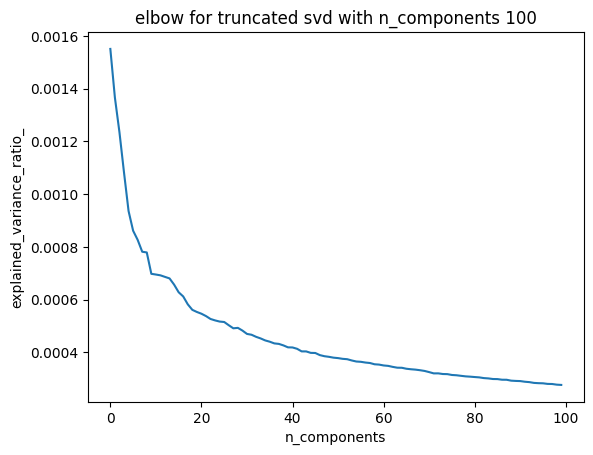

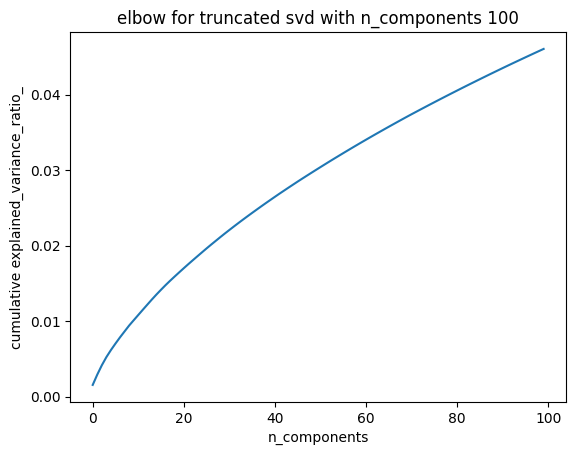

U    :  (24019, 100)
Sigma:  (100,)
VT   :  (100, 939839)


In [61]:
U,Sigma,VT = truncated_svd_elbow(100, X_train_cv)
print("U    : ", U.shape)
print("Sigma: ", Sigma.shape)
print("VT   : ", VT.shape)

Working for k =  10
Working for k =  20
Working for k =  30


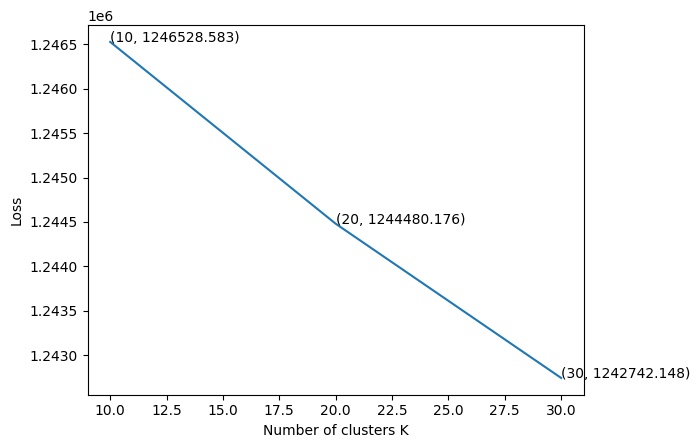

In [62]:
def kmeans_tunning(x_train):
    from sklearn.cluster import KMeans
    k_list = list(range(10,31,10))
    loss_list = [] 
    for k in k_list:        
        print("Working for k = ",k)
        kmeans = KMeans(init = 'k-means++', n_clusters = k, random_state=0)
        kmeans.fit(x_train)
        loss = kmeans.inertia_
        loss_list.append(loss)
        
    #best_k_index = loss_list.index(min(loss_list))
    #optimal_k = k_list[best_k_index]
    
    # plot misclassification error vs k 
    plt.plot(k_list, loss_list)    
    for xy in zip(k_list, np.round(loss_list,3)):
        plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')    
    plt.xlabel('Number of clusters K')
    plt.ylabel('Loss')
    plt.show()
    
    
kmeans_tunning(X_train_cv) 

In [63]:
import itertools

def TruncatedSVD_number_of_n_components_definition(ratio):
    for i in itertools.count(start=1, step=50):
        tsvd = TruncatedSVD(n_components=i, random_state=42)
        X_train_cv_tsvd = tsvd.fit_transform(X_train_cv)
        print(f"Sum of Explained variance ratio for n_components={i}: {round(tsvd.explained_variance_ratio_.sum(),4)}")
        if tsvd.explained_variance_ratio_.sum() >= ratio:
            print("------------------------------------------------------------") 
            print(f"Sum of explained variance ratio: {round(tsvd.explained_variance_ratio_.sum(),4)}")
            print(f"Based on {ratio} Explained variance ratio, Number of n_components: {len(tsvd.explained_variance_ratio_)}")
            break 
        
        
TruncatedSVD_number_of_n_components_definition(0.05)

Sum of Explained variance ratio for n_components=1: 0.0016
Sum of Explained variance ratio for n_components=51: 0.03
Sum of Explained variance ratio for n_components=101: 0.0459
Sum of Explained variance ratio for n_components=151: 0.059
------------------------------------------------------------
Sum of explained variance ratio: 0.059
Based on 0.05 Explained variance ratio, Number of n_components: 151


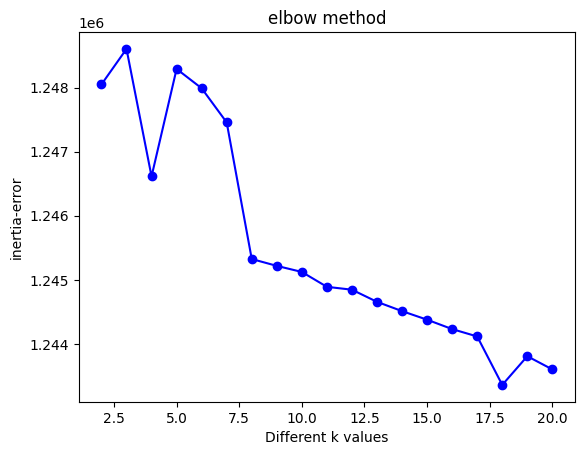

In [64]:
from sklearn.cluster import KMeans

ssd = []
K = range(2, 21)
for k in K:
    model = KMeans(n_clusters= k, random_state= 42)
    model.fit(X_train_cv)
    ssd.append(model.inertia_)

plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("elbow method")
plt.show()

# df_elbow = pd.DataFrame(-pd.Series(ssd).diff()).rename(index= lambda x : x + 1)
# df_elbow.plot(kind ="bar")
# plt.show()

In [65]:
# Create and run an TSVD with one less than number of features
tsvd = TruncatedSVD(n_components=100, random_state=42)
X_train_cv_tsvd = tsvd.fit_transform(X_train_cv)

# List of explained variances
tsvd_var_ratios = tsvd.explained_variance_ratio_
print("------------------------------------------------------------") 
print(f"Sum of explained variance ratio: {round(tsvd.explained_variance_ratio_.sum(),4)}")


def select_n_components(var_ratio, goal_var: float) -> int:
    # Set initial variance explained so far
    total_variance = 0.0
    
    # Set initial number of features
    n_components = 0
    
    # For the explained variance of each feature:
    for explained_variance in var_ratio:
        
        # Add the explained variance to the total
        total_variance += explained_variance
        
        # Add one to the number of components
        n_components += 1
        
        # If we reach our goal level of explained variance
        if total_variance >= goal_var:
            # End the loop
            break
            
    # Return the number of components
    return n_components

print("select_n_components: ", select_n_components(tsvd_var_ratios, 0.95))

------------------------------------------------------------
Sum of explained variance ratio: 0.0456
select_n_components:  100


## Model Comparisons - Vectorization

In [66]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score, roc_curve, RocCurveDisplay  
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, precision_recall_curve
from sklearn.model_selection import cross_val_score, cross_validate

In [67]:
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)    
    print("Train_Set")
    print(classification_report(y_train,y_pred_train))
    print("Test_Set")
    print(classification_report(y_test,y_pred))    
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_).plot()

## Naive Bayes

### CountVectorizer

#### Model Fitting 

In [68]:
# # tsvd = TruncatedSVD(n_components=100, random_state=42)
# X_train_cv_tsvd = tsvd.fit_transform(X_train_cv)
# X_test_cv_tsvd = tsvd.transform(X_test_cv)

In [69]:
# from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler 

# scaler = MinMaxScaler()
# X_train_cv_tsvd_sc = scaler.fit_transform(X_train_cv_tsvd)
# X_test_cv_tsvd_sc = scaler.transform(X_test_cv_tsvd)

In [70]:
# # import libraries
# from sklearn.naive_bayes import MultinomialNB, BernoulliNB
# from sklearn.metrics import f1_score
   
# # train model and generate predictions
# nb = MultinomialNB()
# nb.fit(X_train_cv_tsvd_sc, y_train)
# y_pred = nb.predict(X_test_cv_tsvd_sc)
# y_train_pred = nb.predict(X_train_cv_tsvd_sc)

# print("MultinomialNB MODEL")
# print("-------------------------")
# eval(nb, X_train_cv_tsvd_sc, X_test_cv_tsvd_sc)

MultinomialNB MODEL
-------------------------
Train_Set
              precision    recall  f1-score   support

           0       0.88      0.83      0.85      9750
           1       0.89      0.92      0.90     14269

    accuracy                           0.88     24019
   macro avg       0.88      0.87      0.88     24019
weighted avg       0.88      0.88      0.88     24019

Test_Set
              precision    recall  f1-score   support

           0       0.80      0.74      0.77      2438
           1       0.83      0.88      0.85      3567

    accuracy                           0.82      6005
   macro avg       0.82      0.81      0.81      6005
weighted avg       0.82      0.82      0.82      6005



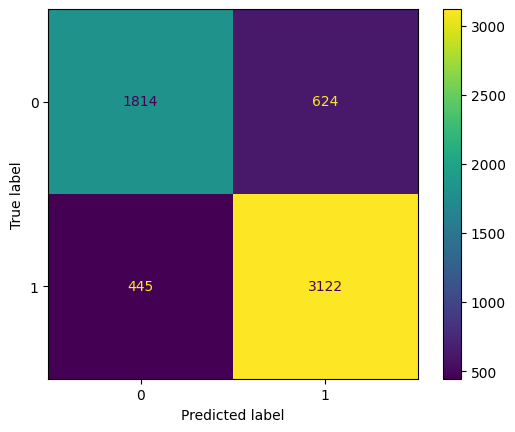

In [71]:
# import libraries
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import f1_score

# convert training data to bag of words
cv = CountVectorizer(analyzer = 'word', ngram_range=(1,1), stop_words='english')
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)
    
# train model and generate predictions
nb = MultinomialNB()
nb.fit(X_train_cv, y_train)
y_pred = nb.predict(X_test_cv)
y_train_pred = nb.predict(X_train_cv)

print("MultinomialNB MODEL")
print("-------------------------")
eval(nb, X_train_cv, X_test_cv)

In [72]:
y_pred_proba = nb.predict_proba(X_test_cv)
my_dict = {"Actual": y_test, "Pred": y_pred, "Pred_proba": y_pred_proba[:,1]}
pd.DataFrame.from_dict(my_dict).sample(20)

,Actual,Pred,Pred_proba
29994,0,0,0.172664
12052,1,1,0.767710
4989,1,1,0.967277
15573,0,0,0.004111
22160,1,1,0.924688
16934,1,1,0.986295
564,0,0,0.000842
10463,0,0,0.032312
22742,1,1,0.637200
19764,0,0,0.171740


In [73]:
nb_cv_scores = {
    "nb_cv_train": {
        "accuracy" : accuracy_score(y_train, y_train_pred),
        "f1_score" : f1_score(y_train, y_train_pred),
        "precision" : precision_score(y_train, y_train_pred),
        "recall" : recall_score(y_train, y_train_pred),
        "roc_auc" : roc_auc_score(y_train, y_train_pred)
        }, 

    "nb_cv_test": {
        "accuracy" : accuracy_score(y_test, y_pred),
        "f1_score" : f1_score(y_test, y_pred),
        "precision" : precision_score(y_test, y_pred),
        "recall" : recall_score(y_test, y_pred),
        "roc_auc" : roc_auc_score(y_test, y_pred)
        }
               }

nb_cv = round(pd.DataFrame(nb_cv_scores),2)
nb_cv

,nb_cv_train,nb_cv_test
accuracy,0.88,0.82
f1_score,0.90,0.85
precision,0.89,0.83
recall,0.92,0.88
roc_auc,0.87,0.81


#### Grid Search

In [74]:
%%time 

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

model = MultinomialNB()

params = {'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 0.5, 1, 10, 100, 1000],
          'fit_prior': [True, False],
          'class_prior': [None, [0.1,]* len(nb.classes_)]
         }

nbModel_grid_cv = RandomizedSearchCV(model, params, scoring= "f1", cv= 10, verbose = 2, n_jobs = -1).fit(X_train_cv, y_train)

print('Best Accuracy Through Grid Search : {:.3f}'.format(nbModel_grid_cv.best_score_))
print('Best Parameters : {}\n'.format(nbModel_grid_cv.best_params_))
nbModel_grid_cv.best_estimator_

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best Accuracy Through Grid Search : 0.842
Best Parameters : {'fit_prior': False, 'class_prior': [0.1, 0.1], 'alpha': 10}

CPU times: total: 1.22 s
Wall time: 13.5 s


MultinomialNB(alpha=10, class_prior=[0.1, 0.1], fit_prior=False)

#### Final Model and Error Metrics

MultinomialNB FINAL MODEL
-------------------------
Train_Set
              precision    recall  f1-score   support

           0       0.88      0.69      0.77      9750
           1       0.81      0.93      0.87     14269

    accuracy                           0.83     24019
   macro avg       0.84      0.81      0.82     24019
weighted avg       0.84      0.83      0.83     24019

Test_Set
              precision    recall  f1-score   support

           0       0.84      0.65      0.73      2438
           1       0.79      0.91      0.85      3567

    accuracy                           0.81      6005
   macro avg       0.81      0.78      0.79      6005
weighted avg       0.81      0.81      0.80      6005



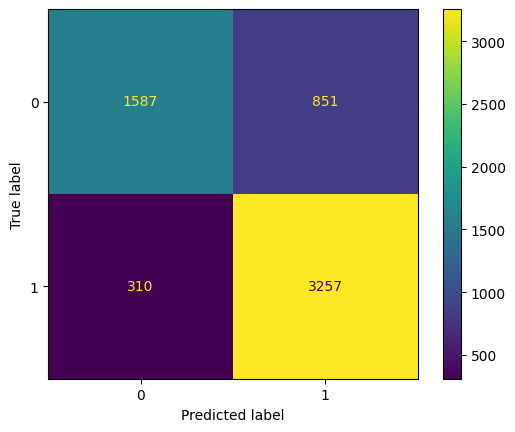

In [75]:
model = nbModel_grid_cv.best_estimator_
model.fit(X_train_cv, y_train)

y_pred_final = model.predict(X_test_cv)
y_train_pred_final = model.predict(X_train_cv)

print("MultinomialNB FINAL MODEL")
print("-------------------------")
eval(model, X_train_cv, X_test_cv)

In [76]:
nb_cv_grid_scores = {
    "nb_cv_grid_train": {
        "accuracy" : accuracy_score(y_train, y_train_pred_final),
        "f1_score" : f1_score(y_train, y_train_pred_final),
        "precision" : precision_score(y_train, y_train_pred_final),
        "recall" : recall_score(y_train, y_train_pred_final),
        "roc_auc" : roc_auc_score(y_train, y_train_pred_final)
        }, 

    "nb_cv_grid_test": {
        "accuracy" : accuracy_score(y_test, y_pred_final),
        "f1_score" : f1_score(y_test, y_pred_final),
        "precision" : precision_score(y_test, y_pred_final),
        "recall" : recall_score(y_test, y_pred_final),
        "roc_auc" : roc_auc_score(y_test, y_pred_final)
        }
               }

nb_cv_grid = round(pd.DataFrame(nb_cv_grid_scores),2)
nb_cv_grid

,nb_cv_grid_train,nb_cv_grid_test
accuracy,0.83,0.81
f1_score,0.87,0.85
precision,0.81,0.79
recall,0.93,0.91
roc_auc,0.81,0.78


In [77]:
nb_cv

,nb_cv_train,nb_cv_test
accuracy,0.88,0.82
f1_score,0.90,0.85
precision,0.89,0.83
recall,0.92,0.88
roc_auc,0.87,0.81


#### Pipeline, Cross Validate, Ngram_range Grid Search

##### Cross Validate

In [78]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate


pipe_nb = make_pipeline(
    CountVectorizer(analyzer = 'word', ngram_range=(1,1), stop_words='english'),
    MultinomialNB()
)
scores = cross_validate(pipe_nb, X_train, y_train, scoring= ["accuracy", "precision", "recall", "f1", "roc_auc"], cv= 10, return_train_score=True)
pd.DataFrame(scores, index= range(1,11))


,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1,test_roc_auc,train_roc_auc
1,0.711338,0.097207,0.821399,0.883934,0.824870,0.886975,0.887877,0.922131,0.855214,0.904211,0.882849,0.947476
2,0.404035,0.189071,0.820566,0.883888,0.828496,0.885407,0.880168,0.924155,0.853551,0.904366,0.883952,0.947256
3,0.422041,0.087008,0.813489,0.886432,0.818893,0.888531,0.880869,0.924856,0.848751,0.906330,0.883208,0.947500
4,0.413040,0.090003,0.811823,0.883934,0.820513,0.885473,0.874562,0.924155,0.846676,0.904401,0.890072,0.946974
5,0.401031,0.090008,0.804746,0.884535,0.817639,0.886622,0.864050,0.923766,0.840204,0.904813,0.879417,0.947273
6,0.384034,0.089007,0.822231,0.882361,0.830688,0.884033,0.880168,0.923065,0.854712,0.903127,0.900303,0.945948
7,0.410031,0.098009,0.817652,0.884905,0.824262,0.887790,0.880869,0.922909,0.851626,0.905009,0.887664,0.946955
8,0.439034,0.087007,0.810575,0.884350,0.817232,0.886530,0.877365,0.923532,0.846232,0.904653,0.885495,0.947102
9,0.404031,0.088006,0.822648,0.882269,0.835681,0.882987,0.873160,0.924311,0.854010,0.903177,0.892738,0.946325
10,0.404035,0.089001,0.817576,0.885188,0.816261,0.887559,0.894109,0.923772,0.853414,0.905303,0.899335,0.946511


In [79]:
pd.DataFrame(scores).mean()[2:]

test_accuracy      0.816271
train_accuracy     0.884180
test_precision     0.823453
train_precision    0.886191
test_recall        0.879320
train_recall       0.923665
test_f1            0.850439
train_f1           0.904539
test_roc_auc       0.888503
train_roc_auc      0.946932
dtype: float64

##### Ngram_range Grid Search

In [80]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

pipe = make_pipeline(CountVectorizer(), MultinomialNB())
# running the grid search takes a long time because of the
# relatively large grid and the inclusion of trigrams
param_grid = {'multinomialnb__alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 0.5, 1, 10, 100, 1000],
          'multinomialnb__fit_prior': [True, False],
          'multinomialnb__class_prior': [None, [0.1,]* len(nb.classes_)],
          "countvectorizer__ngram_range": [(1, 1), (1, 2), (1, 3), (1, 4)]
         }

grid_cv = RandomizedSearchCV(pipe, param_grid, cv=5)
grid_cv.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid_cv.best_score_))
print("Best parameters:\n{}".format(grid_cv.best_params_))

Best cross-validation score: 0.81
Best parameters:
{'multinomialnb__fit_prior': False, 'multinomialnb__class_prior': None, 'multinomialnb__alpha': 0.1, 'countvectorizer__ngram_range': (1, 1)}


In [81]:
pipe = make_pipeline(TfidfVectorizer(), LogisticRegression())

# param_grid = {'multinomialnb__alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 0.5, 1, 10, 100, 1000],
#           'multinomialnb__fit_prior': [True, False],
#           'multinomialnb__class_prior': [None, [0.1,]* len(nb.classes_)],
#           "tfidfvectorizer__ngram_range": [(1, 1), (1, 2), (1, 3), (1, 4)]
#          }
param_grid = {
            "logisticregression__C": np.logspace(-4, 4, 50),
            "logisticregression__penalty": ['l1', 'l2'],
            "logisticregression__solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
            "tfidfvectorizer__ngram_range": [(1, 1), (1, 2), (1, 3), (1, 4)]
            }

grid_tfidf = RandomizedSearchCV(pipe, param_grid, cv=5)
grid_tfidf.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid_tfidf.best_score_))
print("Best parameters:\n{}".format(grid_tfidf.best_params_))

Best cross-validation score: 0.81
Best parameters:
{'tfidfvectorizer__ngram_range': (1, 2), 'logisticregression__solver': 'liblinear', 'logisticregression__penalty': 'l2', 'logisticregression__C': 75.43120063354607}


In [82]:
import pandas as pd
# convert to DataFrame
results = pd.DataFrame(grid_tfidf.cv_results_)
# show the first 5 rows
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_tfidfvectorizer__ngram_range,param_logisticregression__solver,param_logisticregression__penalty,param_logisticregression__C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.660213,0.149485,0.000000,0.000000,"(1, 3)",newton-cg,l1,2222.996483,"{'tfidfvectorizer__ngram_range': (1, 3), 'logi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
1,1.179357,0.023204,0.080205,0.004446,"(1, 1)",liblinear,l1,24.420531,"{'tfidfvectorizer__ngram_range': (1, 1), 'logi...",0.776228,0.776853,0.777477,0.780391,0.782428,0.778675,0.002357,3
2,3.769253,0.174422,0.000000,0.000000,"(1, 4)",sag,l1,494.171336,"{'tfidfvectorizer__ngram_range': (1, 4), 'logi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
3,6.102391,0.539684,0.361548,0.039988,"(1, 4)",lbfgs,l2,0.009103,"{'tfidfvectorizer__ngram_range': (1, 4), 'logi...",0.594088,0.594088,0.594088,0.594088,0.594004,0.594071,0.000034,4
4,0.475832,0.038309,0.000000,0.000000,"(1, 1)",sag,l1,0.004292,"{'tfidfvectorizer__ngram_range': (1, 1), 'logi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,6


#### Evaluating ROC Curve(Receiver Operating Characteristic (ROC)) and AUC(ROC Area Under the Curve (AUC))

In [83]:
# Receiver Operating Characteristic (ROC) curve: this curve shows the trade-off between the True Positive Rate and the False Positive Rate. 
# Represents the performance of the model.

# ROC Area Under the Curve (AUC): the area under the ROC curve. If this area is equal to 1, we have a perfect classifier.
# If it’s equal to 0.5, we have a random classifier.

# Precision-Recall curve: this curve shows precision and recall values at different thresholds. 
# It’s used to visualize the trade-off between Precision and Recall.

In [84]:
from sklearn.metrics import roc_auc_score, roc_curve

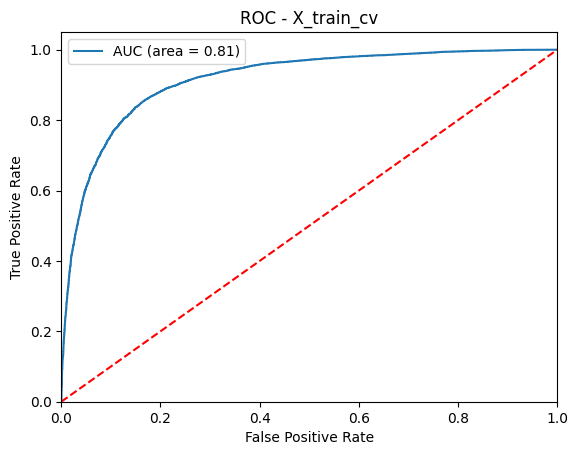

In [85]:
# for X_train_cv

logit_roc_auc = roc_auc_score(y_train, model.predict(X_train_cv))

fpr, tpr, thresholds = roc_curve(y_train, model.predict_proba(X_train_cv)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC - X_train_cv')
plt.show()

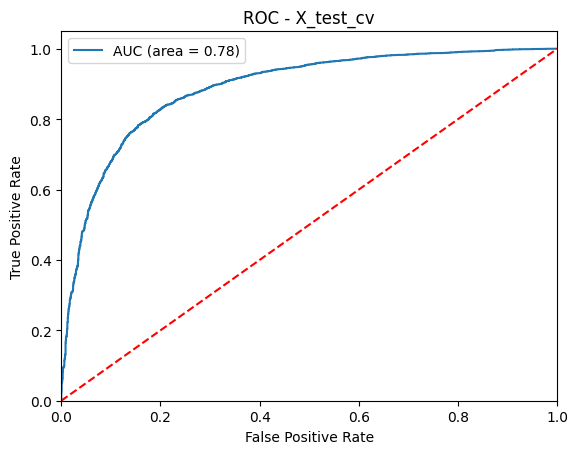

In [86]:
# for X_test_cv

logit_roc_auc = roc_auc_score(y_test, model.predict(X_test_cv))

fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test_cv)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC - X_test_cv')
plt.show()

#### Evaluating PrecisionRecallCurve

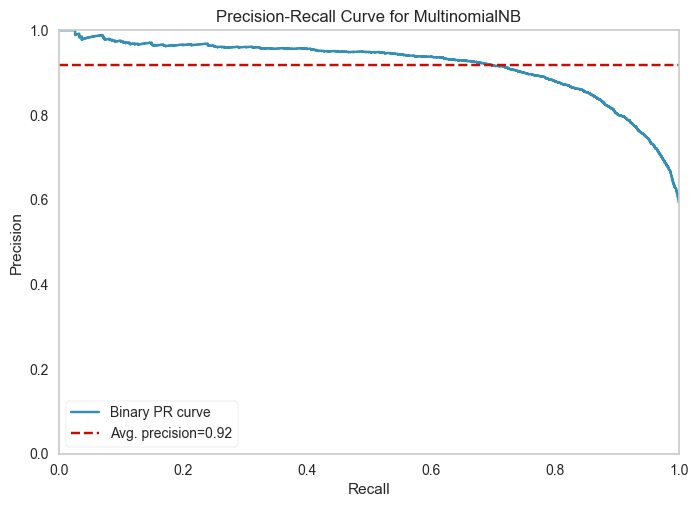

In [87]:
# !pip install yellowbrick
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
    MultinomialNB(),
    classes=nb.classes_,   # label ların isimleri ile gözükmesi için.. aksi halde isim yerine 0,1,2 diye gözükür 
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_cv,y_train)
viz.score(X_test_cv, y_test)
viz.show();

# datada dengesizlik (umbalance) söz konusu olduğu için skorlarım gerçekçi olsun diye viz = PrecisionRecallCurve u kullandım.
# data imbalance olduğu için precision recall kullanıldı


In [88]:
viz.score_

0.9179889700550405

### Tf-idf Vectorization

#### Model Fitting 

MultinomialNB MODEL
-------------------------
Train_Set
              precision    recall  f1-score   support

           0       0.92      0.70      0.80      9750
           1       0.83      0.96      0.89     14269

    accuracy                           0.85     24019
   macro avg       0.87      0.83      0.84     24019
weighted avg       0.86      0.85      0.85     24019

Test_Set
              precision    recall  f1-score   support

           0       0.86      0.60      0.71      2438
           1       0.77      0.93      0.85      3567

    accuracy                           0.80      6005
   macro avg       0.82      0.77      0.78      6005
weighted avg       0.81      0.80      0.79      6005



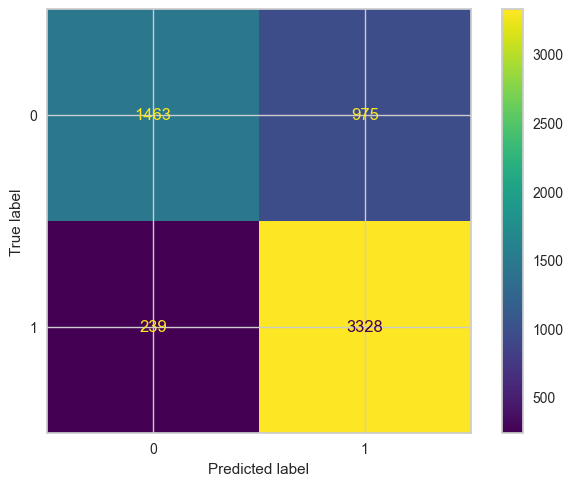

In [89]:
# import libraries
from sklearn.feature_extraction.text import TfidfVectorizer

# convert training data to tf-idf
tf_idf_vectorizer = TfidfVectorizer()
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)
    
# train model and generate predictions
nb = MultinomialNB()
nb.fit(X_train_tf_idf, y_train)
y_pred = nb.predict(X_test_tf_idf)
y_train_pred = nb.predict(X_train_tf_idf)

print("MultinomialNB MODEL")
print("-------------------------")
eval(nb, X_train_tf_idf, X_test_tf_idf)

In [90]:
nb_tf_scores = {
    "nb_tf_train": {
        "accuracy" : accuracy_score(y_train, y_train_pred),
        "f1_score" : f1_score(y_train, y_train_pred),
        "precision" : precision_score(y_train, y_train_pred),
        "recall" : recall_score(y_train, y_train_pred),
        "roc_auc" : roc_auc_score(y_train, y_train_pred)
        }, 

    "nb_tf_test": {
        "accuracy" : accuracy_score(y_test, y_pred),
        "f1_score" : f1_score(y_test, y_pred),
        "precision" : precision_score(y_test, y_pred),
        "recall" : recall_score(y_test, y_pred),
        "roc_auc" : roc_auc_score(y_test, y_pred)
        }
               }

nb_tf = round(pd.DataFrame(nb_tf_scores),2)
nb_tf

,nb_tf_train,nb_tf_test
accuracy,0.85,0.80
f1_score,0.89,0.85
precision,0.83,0.77
recall,0.96,0.93
roc_auc,0.83,0.77


#### Grid Search

In [91]:
%%time 

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

model = MultinomialNB()

params = {'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 0.5, 1, 10, 100, 1000],
          'fit_prior': [True, False],
          'class_prior': [None, [0.1,]* len(nb.classes_), ]
         }

nbModel_grid_tf = RandomizedSearchCV(model, params, scoring= "f1", cv= 10, verbose = 2, n_jobs = -1).fit(X_train_tf_idf, y_train)

print('Best Accuracy Through Grid Search : {:.3f}'.format(nbModel_grid_tf.best_score_))
print('Best Parameters : {}\n'.format(nbModel_grid_tf.best_params_))
nbModel_grid_tf.best_estimator_

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best Accuracy Through Grid Search : 0.851
Best Parameters : {'fit_prior': False, 'class_prior': [0.1, 0.1], 'alpha': 1}

CPU times: total: 875 ms
Wall time: 8.62 s


MultinomialNB(alpha=1, class_prior=[0.1, 0.1], fit_prior=False)

#### Final Model and Error Metrics

MultinomialNB FINAL MODEL
-------------------------
Train_Set
              precision    recall  f1-score   support

           0       0.88      0.81      0.84      9750
           1       0.88      0.92      0.90     14269

    accuracy                           0.88     24019
   macro avg       0.88      0.87      0.87     24019
weighted avg       0.88      0.88      0.88     24019

Test_Set
              precision    recall  f1-score   support

           0       0.81      0.73      0.77      2438
           1       0.83      0.89      0.86      3567

    accuracy                           0.82      6005
   macro avg       0.82      0.81      0.81      6005
weighted avg       0.82      0.82      0.82      6005



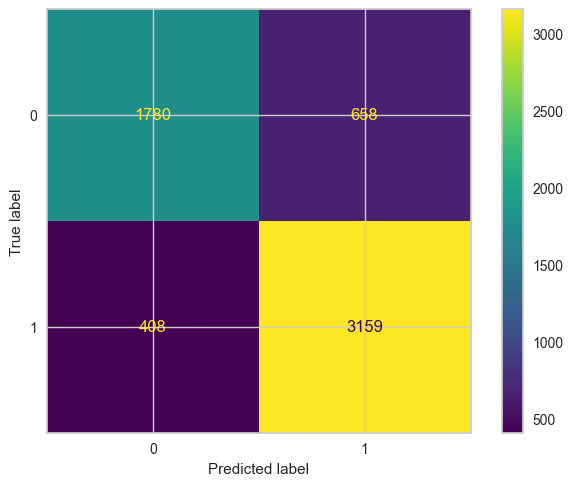

In [92]:
model = nbModel_grid_tf.best_estimator_
# model = MultinomialNB('fit_prior': False, 'class_prior': None, 'alpha': 1)
model.fit(X_train_tf_idf, y_train)

y_pred_final = model.predict(X_test_tf_idf)
y_train_pred_final = model.predict(X_train_tf_idf)

print("MultinomialNB FINAL MODEL")
print("-------------------------")
eval(model, X_train_tf_idf, X_test_tf_idf)

In [93]:
nb_tf_grid_scores = {
    "nb_tf_grid_train": {
        "accuracy" : accuracy_score(y_train, y_train_pred_final),
        "f1_score" : f1_score(y_train, y_train_pred_final),
        "precision" : precision_score(y_train, y_train_pred_final),
        "recall" : recall_score(y_train, y_train_pred_final),
        "roc_auc" : roc_auc_score(y_train, y_train_pred_final)
        }, 

    "nb_tf_grid_test": {
        "accuracy" : accuracy_score(y_test, y_pred_final),
        "f1_score" : f1_score(y_test, y_pred_final),
        "precision" : precision_score(y_test, y_pred_final),
        "recall" : recall_score(y_test, y_pred_final),
        "roc_auc" : roc_auc_score(y_test, y_pred_final)
        }
               }

nb_tf_grid = round(pd.DataFrame(nb_tf_grid_scores),2)
nb_tf_grid

,nb_tf_grid_train,nb_tf_grid_test
accuracy,0.88,0.82
f1_score,0.90,0.86
precision,0.88,0.83
recall,0.92,0.89
roc_auc,0.87,0.81


In [94]:
nb_tf

,nb_tf_train,nb_tf_test
accuracy,0.85,0.80
f1_score,0.89,0.85
precision,0.83,0.77
recall,0.96,0.93
roc_auc,0.83,0.77


## Logistic Regression

### CountVectorizer

#### Model Fitting 

Logistic Regression MODEL
-------------------------
Train_Set
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      9750
           1       0.94      0.96      0.95     14269

    accuracy                           0.94     24019
   macro avg       0.94      0.93      0.93     24019
weighted avg       0.94      0.94      0.94     24019

Test_Set
              precision    recall  f1-score   support

           0       0.78      0.75      0.77      2438
           1       0.84      0.86      0.85      3567

    accuracy                           0.81      6005
   macro avg       0.81      0.80      0.81      6005
weighted avg       0.81      0.81      0.81      6005



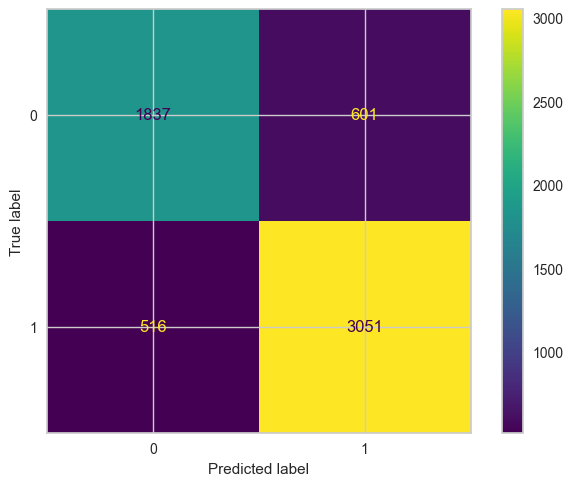

In [95]:
# import libraries
from sklearn.linear_model import LogisticRegression

# convert training data to logistic regression
cv = CountVectorizer(analyzer = 'word', ngram_range=(1,1), stop_words='english')
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)
    
# train model and generate predictions
# log = LogisticRegression(C =0.6, max_iter=1000, class_weight= "balanced", random_state=42)
log = LogisticRegression()
log.fit(X_train_cv, y_train)
y_pred = log.predict(X_test_cv)
y_train_pred = log.predict(X_train_cv)

print("Logistic Regression MODEL")
print("-------------------------")
eval(log, X_train_cv, X_test_cv)

In [96]:
log_cv_scores = {
    "log_cv_train": {
        "accuracy" : accuracy_score(y_train, y_train_pred),
        "f1_score" : f1_score(y_train, y_train_pred),
        "precision" : precision_score(y_train, y_train_pred),
        "recall" : recall_score(y_train, y_train_pred),
        "roc_auc" : roc_auc_score(y_train, y_train_pred)
        }, 

    "log_cv_test": {
        "accuracy" : accuracy_score(y_test, y_pred),
        "f1_score" : f1_score(y_test, y_pred),
        "precision" : precision_score(y_test, y_pred),
        "recall" : recall_score(y_test, y_pred),
        "roc_auc" : roc_auc_score(y_test, y_pred)
        }
               }

log_cv = round(pd.DataFrame(log_cv_scores),2)
log_cv

,log_cv_train,log_cv_test
accuracy,0.94,0.81
f1_score,0.95,0.85
precision,0.94,0.84
recall,0.96,0.86
roc_auc,0.93,0.80


#### Grid Search

In [97]:
# %%time 

# from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# model = LogisticRegression()

# params = {
#     "C": np.logspace(-4, 4, 50),
#     "penalty": ['l1', 'l2'],
#     "solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
#     }

# # params = {
# #     "C": np.logspace(-4, 4, 50),
# #     "penalty": ['l1', 'l2'],
# #     "solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
# #     "max_iter": list(range(100,800,100)),
# #     'class_weight':[{ 0:0.95, 1:0.05 }, { 0:0.55, 1:0.45 }, { 0:0.45, 1:0.55 },{ 0:0.05, 1:0.95 }]
# #     }

# logModel_grid_cv = RandomizedSearchCV(model, params, scoring= "f1", cv= 10, verbose = 2, n_jobs = -1, random_state=42).fit(X_train_cv, y_train)

# print('Best Accuracy Through Grid Search : {:.3f}'.format(logModel_grid_cv.best_score_))
# print('Best Parameters : {}\n'.format(logModel_grid_cv.best_params_))
# logModel_grid_cv.best_estimator_

#### Final Model and Error Metrics

Logistic Regression FINAL MODEL
-------------------------
Train_Set
              precision    recall  f1-score   support

           0       0.86      0.70      0.77      9750
           1       0.82      0.92      0.87     14269

    accuracy                           0.83     24019
   macro avg       0.84      0.81      0.82     24019
weighted avg       0.83      0.83      0.83     24019

Test_Set
              precision    recall  f1-score   support

           0       0.81      0.66      0.73      2438
           1       0.79      0.90      0.84      3567

    accuracy                           0.80      6005
   macro avg       0.80      0.78      0.78      6005
weighted avg       0.80      0.80      0.79      6005



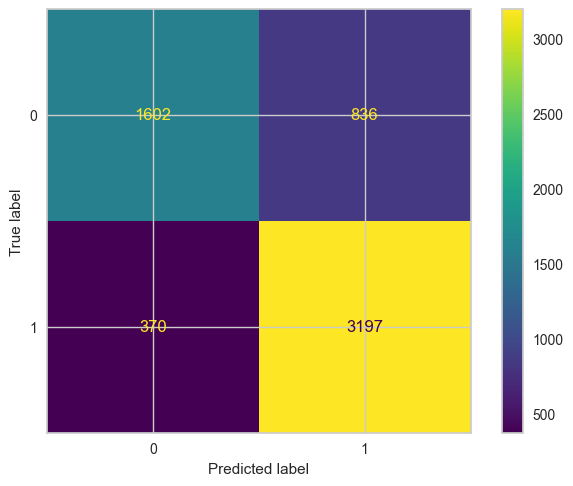

In [98]:
# model = logModel_grid_cv.best_estimator_
model = LogisticRegression(C=0.02811768697974228, penalty='l2', solver='newton-cg')

model.fit(X_train_cv, y_train)

y_pred_final = model.predict(X_test_cv)
y_train_pred_final = model.predict(X_train_cv)

print("Logistic Regression FINAL MODEL")
print("-------------------------")
eval(model, X_train_cv, X_test_cv)

In [99]:
log_cv_grid_scores = {
    "log_cv_grid_train": {
        "accuracy" : accuracy_score(y_train, y_train_pred_final),
        "f1_score" : f1_score(y_train, y_train_pred_final),
        "precision" : precision_score(y_train, y_train_pred_final),
        "recall" : recall_score(y_train, y_train_pred_final),
        "roc_auc" : roc_auc_score(y_train, y_train_pred_final)
        }, 

    "log_cv_grid_test": {
        "accuracy" : accuracy_score(y_test, y_pred_final),
        "f1_score" : f1_score(y_test, y_pred_final),
        "precision" : precision_score(y_test, y_pred_final),
        "recall" : recall_score(y_test, y_pred_final),
        "roc_auc" : roc_auc_score(y_test, y_pred_final)
        }
               }

log_cv_grid = round(pd.DataFrame(log_cv_grid_scores),2)
log_cv_grid

,log_cv_grid_train,log_cv_grid_test
accuracy,0.83,0.80
f1_score,0.87,0.84
precision,0.82,0.79
recall,0.92,0.90
roc_auc,0.81,0.78


In [100]:
log_cv

,log_cv_train,log_cv_test
accuracy,0.94,0.81
f1_score,0.95,0.85
precision,0.94,0.84
recall,0.96,0.86
roc_auc,0.93,0.80


### Tf-idf Vectorization

#### Model Fitting 

Logistic Regression MODEL
-------------------------
Train_Set
              precision    recall  f1-score   support

           0       0.92      0.70      0.80      9750
           1       0.83      0.96      0.89     14269

    accuracy                           0.85     24019
   macro avg       0.87      0.83      0.84     24019
weighted avg       0.86      0.85      0.85     24019

Test_Set
              precision    recall  f1-score   support

           0       0.86      0.60      0.71      2438
           1       0.77      0.93      0.85      3567

    accuracy                           0.80      6005
   macro avg       0.82      0.77      0.78      6005
weighted avg       0.81      0.80      0.79      6005



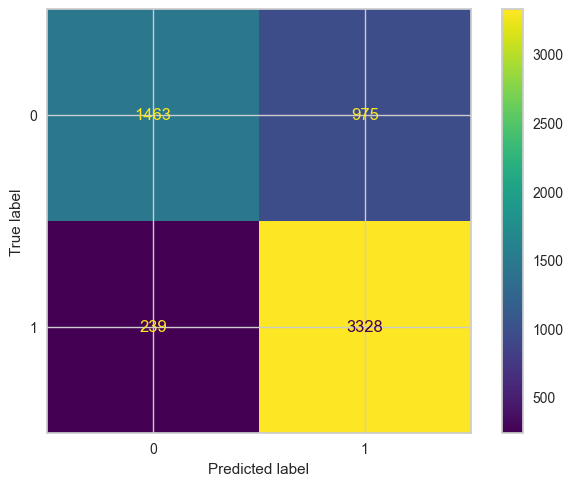

In [101]:
# import libraries
from sklearn.feature_extraction.text import TfidfVectorizer

# convert training data to tf-idf
tf_idf_vectorizer = TfidfVectorizer()
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)
    
# train model and generate predictions
log = MultinomialNB()
log.fit(X_train_tf_idf, y_train)
y_pred = log.predict(X_test_tf_idf)
y_train_pred = log.predict(X_train_tf_idf)

print("Logistic Regression MODEL")
print("-------------------------")
eval(log, X_train_tf_idf, X_test_tf_idf)

In [102]:
log_tf_scores = {
    "log_tf_train": {
        "accuracy" : accuracy_score(y_train, y_train_pred),
        "f1_score" : f1_score(y_train, y_train_pred),
        "precision" : precision_score(y_train, y_train_pred),
        "recall" : recall_score(y_train, y_train_pred),
        "roc_auc" : roc_auc_score(y_train, y_train_pred)
        }, 

    "log_tf_test": {
        "accuracy" : accuracy_score(y_test, y_pred),
        "f1_score" : f1_score(y_test, y_pred),
        "precision" : precision_score(y_test, y_pred),
        "recall" : recall_score(y_test, y_pred),
        "roc_auc" : roc_auc_score(y_test, y_pred)
        }
               }

log_tf = round(pd.DataFrame(log_tf_scores),2)
log_tf

,log_tf_train,log_tf_test
accuracy,0.85,0.80
f1_score,0.89,0.85
precision,0.83,0.77
recall,0.96,0.93
roc_auc,0.83,0.77


#### Grid Search

In [103]:
# %%time 

# from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# model = LogisticRegression()

# params = {
#     "C": np.logspace(-4, 4, 50),
#     "penalty": ['l1', 'l2'],
#     "solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
#     }
# # params = {
# #     "C": np.logspace(-4, 4, 50),
# #     "penalty": ['l1', 'l2'],
# #     "solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
# #     "max_iter": list(range(100,800,100)),
# #     'class_weight':[{ 0:0.95, 1:0.05 }, { 0:0.55, 1:0.45 }, { 0:0.45, 1:0.55 },{ 0:0.05, 1:0.95 }]
# #     }

# logModel_grid_tf = RandomizedSearchCV(model, params, scoring= "f1", cv= 10, verbose = 2, n_jobs = -1, random_state=42).fit(X_train_tf_idf, y_train)

# print('Best Accuracy Through Grid Search : {:.3f}'.format(logModel_grid_tf.best_score_))
# print('Best Parameters : {}\n'.format(logModel_grid_tf.best_params_))
# logModel_grid_tf.best_estimator_

#### Final Model and Error Metrics

Logistic Regression FINAL MODEL
-------------------------
Train_Set
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      9750
           1       0.99      0.99      0.99     14269

    accuracy                           0.99     24019
   macro avg       0.99      0.99      0.99     24019
weighted avg       0.99      0.99      0.99     24019

Test_Set
              precision    recall  f1-score   support

           0       0.75      0.74      0.74      2438
           1       0.82      0.83      0.83      3567

    accuracy                           0.79      6005
   macro avg       0.78      0.78      0.78      6005
weighted avg       0.79      0.79      0.79      6005



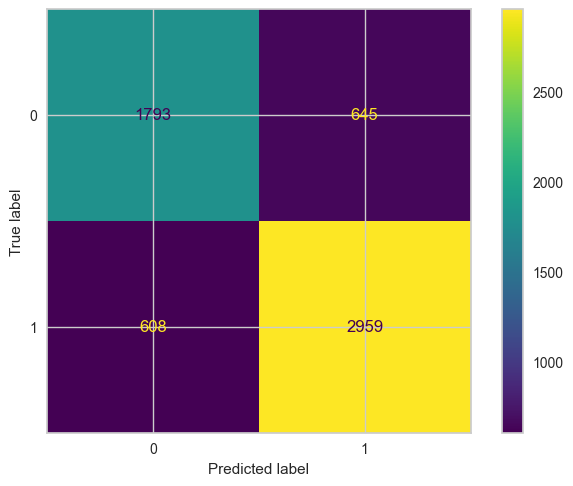

In [104]:
# model = logModel_grid_tf.best_estimator_
model = LogisticRegression(C=109.85411419875572, penalty='l2', solver='liblinear')

model.fit(X_train_tf_idf, y_train)

y_pred_final = model.predict(X_test_tf_idf)
y_train_pred_final = model.predict(X_train_tf_idf)

print("Logistic Regression FINAL MODEL")
print("-------------------------")
eval(model, X_train_tf_idf, X_test_tf_idf)

In [105]:
log_tf_grid_scores = {
    "log_tf_grid_train": {
        "accuracy" : accuracy_score(y_train, y_train_pred_final),
        "f1_score" : f1_score(y_train, y_train_pred_final),
        "precision" : precision_score(y_train, y_train_pred_final),
        "recall" : recall_score(y_train, y_train_pred_final),
        "roc_auc" : roc_auc_score(y_train, y_train_pred_final)
        }, 

    "log_tf_grid_test": {
        "accuracy" : accuracy_score(y_test, y_pred_final),
        "f1_score" : f1_score(y_test, y_pred_final),
        "precision" : precision_score(y_test, y_pred_final),
        "recall" : recall_score(y_test, y_pred_final),
        "roc_auc" : roc_auc_score(y_test, y_pred_final)
        }
               }

log_tf_grid = round(pd.DataFrame(log_tf_grid_scores),2)
log_tf_grid

,log_tf_grid_train,log_tf_grid_test
accuracy,0.99,0.79
f1_score,0.99,0.83
precision,0.99,0.82
recall,0.99,0.83
roc_auc,0.99,0.78


In [106]:
log_tf

,log_tf_train,log_tf_test
accuracy,0.85,0.80
f1_score,0.89,0.85
precision,0.83,0.77
recall,0.96,0.93
roc_auc,0.83,0.77


## Random Forest

### CountVectorizer

#### Model Fitting 

Random Forest Classifier MODEL
-------------------------
Train_Set
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      9750
           1       0.99      0.99      0.99     14269

    accuracy                           0.99     24019
   macro avg       0.99      0.99      0.99     24019
weighted avg       0.99      0.99      0.99     24019

Test_Set
              precision    recall  f1-score   support

           0       0.79      0.72      0.75      2438
           1       0.82      0.87      0.84      3567

    accuracy                           0.81      6005
   macro avg       0.81      0.79      0.80      6005
weighted avg       0.81      0.81      0.81      6005



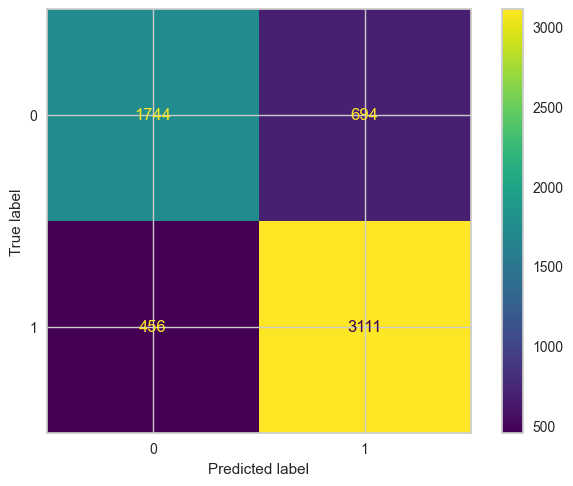

In [107]:
# import libraries
from sklearn.ensemble import RandomForestClassifier

# convert training data to random forest
cv = CountVectorizer(analyzer = 'word', ngram_range=(1,1), stop_words='english')
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)
    
# train model and generate predictions
rf = RandomForestClassifier()
rf.fit(X_train_cv, y_train)
y_pred = rf.predict(X_test_cv)
y_train_pred = rf.predict(X_train_cv)

print("Random Forest Classifier MODEL")
print("-------------------------")
eval(rf, X_train_cv, X_test_cv)

In [108]:
rf_cv_scores = {
    "rf_cv_train": {
        "accuracy" : accuracy_score(y_train, y_train_pred),
        "f1_score" : f1_score(y_train, y_train_pred),
        "precision" : precision_score(y_train, y_train_pred),
        "recall" : recall_score(y_train, y_train_pred),
        "roc_auc" : roc_auc_score(y_train, y_train_pred)
        }, 

    "rf_cv_test": {
        "accuracy" : accuracy_score(y_test, y_pred),
        "f1_score" : f1_score(y_test, y_pred),
        "precision" : precision_score(y_test, y_pred),
        "recall" : recall_score(y_test, y_pred),
        "roc_auc" : roc_auc_score(y_test, y_pred)
        }
               }

rf_cv = round(pd.DataFrame(rf_cv_scores),2)
rf_cv

,rf_cv_train,rf_cv_test
accuracy,0.99,0.81
f1_score,0.99,0.84
precision,0.99,0.82
recall,0.99,0.87
roc_auc,0.99,0.79


#### Grid Search

In [109]:
# %%time 

# from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# model = RandomForestClassifier()

# params = {'bootstrap': [True, False],
#         'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
#         'max_features': ['auto', 'sqrt'],
#         'min_samples_split': [2, 5, 10],
#         'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
#         }
        
# rfModel_grid_cv = RandomizedSearchCV(model, params, scoring= "f1", cv= 10, verbose = 2, n_jobs = -1, random_state=42).fit(X_train_cv, y_train)

# print('Best Accuracy Through Grid Search : {:.3f}'.format(rfModel_grid_cv.best_score_))
# print('Best Parameters : {}\n'.format(rfModel_grid_cv.best_params_))
# rfModel_grid_cv.best_estimator_

#### Final Model and Error Metrics

Random Forest Classifier FINAL MODEL
-------------------------
Train_Set
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      9750
           1       1.00      0.99      0.99     14269

    accuracy                           0.99     24019
   macro avg       0.99      0.99      0.99     24019
weighted avg       0.99      0.99      0.99     24019

Test_Set
              precision    recall  f1-score   support

           0       0.79      0.72      0.75      2438
           1       0.82      0.87      0.84      3567

    accuracy                           0.81      6005
   macro avg       0.80      0.79      0.80      6005
weighted avg       0.81      0.81      0.81      6005



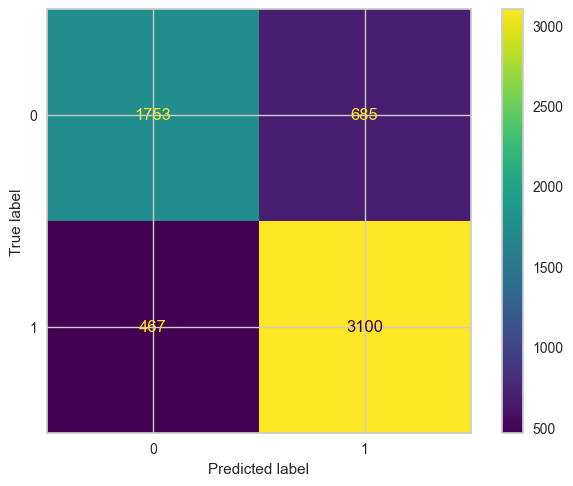

In [110]:
# model = rfModel_grid_cv.best_estimator_
model = RandomForestClassifier(n_estimators= 1000, 
                                min_samples_split= 2, 
                                min_samples_leaf= 1, 
                                max_features= 'sqrt', 
                                max_depth= None, 
                                bootstrap= False)

model.fit(X_train_cv, y_train)

y_pred_final = model.predict(X_test_cv)
y_train_pred_final = model.predict(X_train_cv)

print("Random Forest Classifier FINAL MODEL")
print("-------------------------")
eval(model, X_train_cv, X_test_cv)

In [111]:
rf_cv_grid_scores = {
    "rf_cv_grid_train": {
        "accuracy" : accuracy_score(y_train, y_train_pred_final),
        "f1_score" : f1_score(y_train, y_train_pred_final),
        "precision" : precision_score(y_train, y_train_pred_final),
        "recall" : recall_score(y_train, y_train_pred_final),
        "roc_auc" : roc_auc_score(y_train, y_train_pred_final)
        }, 

    "rf_cv_grid_test": {
        "accuracy" : accuracy_score(y_test, y_pred_final),
        "f1_score" : f1_score(y_test, y_pred_final),
        "precision" : precision_score(y_test, y_pred_final),
        "recall" : recall_score(y_test, y_pred_final),
        "roc_auc" : roc_auc_score(y_test, y_pred_final)
        }
               }

rf_cv_grid = round(pd.DataFrame(rf_cv_grid_scores),2)
rf_cv_grid

,rf_cv_grid_train,rf_cv_grid_test
accuracy,0.99,0.81
f1_score,0.99,0.84
precision,1.00,0.82
recall,0.99,0.87
roc_auc,0.99,0.79


In [112]:
rf_cv

,rf_cv_train,rf_cv_test
accuracy,0.99,0.81
f1_score,0.99,0.84
precision,0.99,0.82
recall,0.99,0.87
roc_auc,0.99,0.79


### Tf-idf Vectorization

#### Model Fitting 

Random Forest Classifier MODEL
-------------------------
Train_Set
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      9750
           1       0.99      1.00      0.99     14269

    accuracy                           0.99     24019
   macro avg       0.99      0.99      0.99     24019
weighted avg       0.99      0.99      0.99     24019

Test_Set
              precision    recall  f1-score   support

           0       0.79      0.68      0.73      2438
           1       0.80      0.87      0.83      3567

    accuracy                           0.80      6005
   macro avg       0.79      0.78      0.78      6005
weighted avg       0.79      0.80      0.79      6005



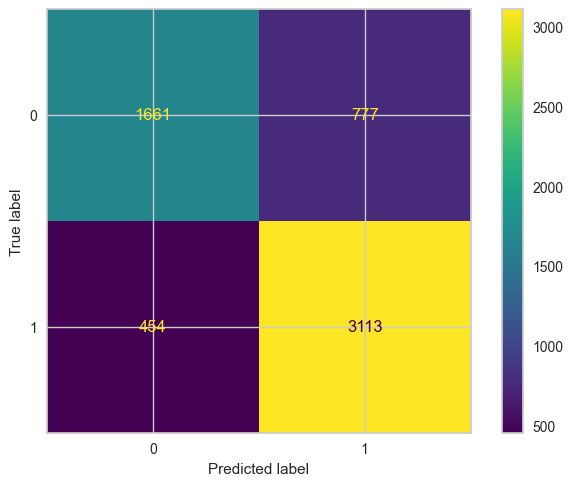

In [113]:
# import libraries
from sklearn.feature_extraction.text import TfidfVectorizer

# convert training data to tf-idf
tf_idf_vectorizer = TfidfVectorizer()
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)
    
# train model and generate predictions
rf = RandomForestClassifier()
rf.fit(X_train_tf_idf, y_train)
y_pred = rf.predict(X_test_tf_idf)
y_train_pred = rf.predict(X_train_tf_idf)

print("Random Forest Classifier MODEL")
print("-------------------------")
eval(rf, X_train_tf_idf, X_test_tf_idf)

In [114]:
rf_tf_scores = {
    "rf_tf_train": {
        "accuracy" : accuracy_score(y_train, y_train_pred),
        "f1_score" : f1_score(y_train, y_train_pred),
        "precision" : precision_score(y_train, y_train_pred),
        "recall" : recall_score(y_train, y_train_pred),
        "roc_auc" : roc_auc_score(y_train, y_train_pred)
        }, 

    "rf_tf_test": {
        "accuracy" : accuracy_score(y_test, y_pred),
        "f1_score" : f1_score(y_test, y_pred),
        "precision" : precision_score(y_test, y_pred),
        "recall" : recall_score(y_test, y_pred),
        "roc_auc" : roc_auc_score(y_test, y_pred)
        }
               }

rf_tf = round(pd.DataFrame(rf_tf_scores),2)
rf_tf

,rf_tf_train,rf_tf_test
accuracy,0.99,0.80
f1_score,0.99,0.83
precision,0.99,0.80
recall,1.00,0.87
roc_auc,0.99,0.78


#### Grid Search

In [115]:
# %%time 

# from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# model = RandomForestClassifier()

# params = {'bootstrap': [True, False],
#         'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
#         'max_features': ['auto', 'sqrt'],
#         'min_samples_leaf': [1, 2, 4],
#         'min_samples_split': [2, 5, 10],
#         'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
#         }

# rfModel_grid_tf = RandomizedSearchCV(model, params, scoring= "f1", cv= 10, verbose = 2, n_jobs = -1, random_state=42).fit(X_train_tf_idf, y_train)

# print('Best Accuracy Through Grid Search : {:.3f}'.format(rfModel_grid_tf.best_score_))
# print('Best Parameters : {}\n'.format(rfModel_grid_tf.best_params_))
# rfModel_grid_tf.best_estimator_

#### Final Model and Error Metrics

Random Forest Classifier FINAL MODEL
-------------------------
Train_Set
              precision    recall  f1-score   support

           0       0.99      0.75      0.85      9750
           1       0.85      1.00      0.92     14269

    accuracy                           0.90     24019
   macro avg       0.92      0.87      0.89     24019
weighted avg       0.91      0.90      0.89     24019

Test_Set
              precision    recall  f1-score   support

           0       0.84      0.53      0.65      2438
           1       0.74      0.93      0.83      3567

    accuracy                           0.77      6005
   macro avg       0.79      0.73      0.74      6005
weighted avg       0.78      0.77      0.75      6005



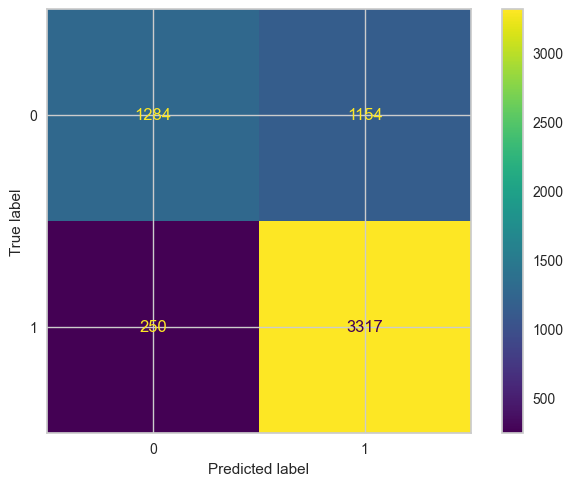

In [116]:
# model = rfModel_grid_tf.best_estimator_
model = RandomForestClassifier(n_estimators= 1800, 
                                min_samples_split= 5, 
                                min_samples_leaf= 1, 
                                max_features= 'auto', 
                                max_depth= 100, 
                                bootstrap= True)

model.fit(X_train_tf_idf, y_train)

y_pred_final = model.predict(X_test_tf_idf)
y_train_pred_final = model.predict(X_train_tf_idf)

print("Random Forest Classifier FINAL MODEL")
print("-------------------------")
eval(model, X_train_tf_idf, X_test_tf_idf)

In [117]:
rf_tf_grid_scores = {
    "rf_tf_grid_train": {
        "accuracy" : accuracy_score(y_train, y_train_pred_final),
        "f1_score" : f1_score(y_train, y_train_pred_final),
        "precision" : precision_score(y_train, y_train_pred_final),
        "recall" : recall_score(y_train, y_train_pred_final),
        "roc_auc" : roc_auc_score(y_train, y_train_pred_final)
        }, 

    "rf_tf_grid_test": {
        "accuracy" : accuracy_score(y_test, y_pred_final),
        "f1_score" : f1_score(y_test, y_pred_final),
        "precision" : precision_score(y_test, y_pred_final),
        "recall" : recall_score(y_test, y_pred_final),
        "roc_auc" : roc_auc_score(y_test, y_pred_final)
        }
               }

rf_tf_grid = round(pd.DataFrame(rf_tf_grid_scores),2)
rf_tf_grid

,rf_tf_grid_train,rf_tf_grid_test
accuracy,0.90,0.77
f1_score,0.92,0.83
precision,0.85,0.74
recall,1.00,0.93
roc_auc,0.87,0.73


In [118]:
rf_tf

,rf_tf_train,rf_tf_test
accuracy,0.99,0.80
f1_score,0.99,0.83
precision,0.99,0.80
recall,1.00,0.87
roc_auc,0.99,0.78


## XGBClassifier

### CountVectorizer

#### Model Fitting 

XGBClassifier MODEL
-------------------------
Train_Set
              precision    recall  f1-score   support

           0       0.86      0.51      0.64      9750
           1       0.74      0.94      0.83     14269

    accuracy                           0.77     24019
   macro avg       0.80      0.72      0.73     24019
weighted avg       0.79      0.77      0.75     24019

Test_Set
              precision    recall  f1-score   support

           0       0.82      0.48      0.61      2438
           1       0.72      0.93      0.81      3567

    accuracy                           0.75      6005
   macro avg       0.77      0.70      0.71      6005
weighted avg       0.76      0.75      0.73      6005



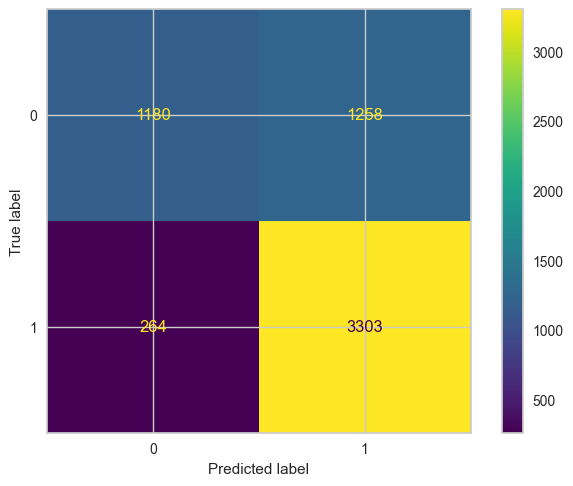

In [119]:
# import libraries
from xgboost import XGBClassifier

# convert training data to random forest
cv = CountVectorizer(analyzer = 'word', ngram_range=(1,1), stop_words='english')
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)
    
# train model and generate predictions
xg = XGBClassifier()
xg.fit(X_train_cv, y_train)
y_pred = xg.predict(X_test_cv)
y_train_pred = xg.predict(X_train_cv)

print("XGBClassifier MODEL")
print("-------------------------")
eval(xg, X_train_cv, X_test_cv)

In [120]:
xg_cv_scores = {
    "xg_cv_train": {
        "accuracy" : accuracy_score(y_train, y_train_pred),
        "f1_score" : f1_score(y_train, y_train_pred),
        "precision" : precision_score(y_train, y_train_pred),
        "recall" : recall_score(y_train, y_train_pred),
        "roc_auc" : roc_auc_score(y_train, y_train_pred)
        }, 

    "xg_cv_test": {
        "accuracy" : accuracy_score(y_test, y_pred),
        "f1_score" : f1_score(y_test, y_pred),
        "precision" : precision_score(y_test, y_pred),
        "recall" : recall_score(y_test, y_pred),
        "roc_auc" : roc_auc_score(y_test, y_pred)
        }
               }

xg_cv = round(pd.DataFrame(xg_cv_scores),2)
xg_cv

,xg_cv_train,xg_cv_test
accuracy,0.77,0.75
f1_score,0.83,0.81
precision,0.74,0.72
recall,0.94,0.93
roc_auc,0.72,0.70


#### Grid Search

In [121]:
%%time 

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

model = XGBClassifier()

params = {"n_estimators": [50, 100, 300, 500, 1000], 
              "max_depth": [3, 5, 6], 
              "learning_rate": [0.01, 0.1],
             "subsample": [0.5, 1], 
             "colsample_bytree": [0.5, 1]
             }

xgModel_grid_cv = RandomizedSearchCV(model, params, scoring= "f1", cv= 10, verbose = 2, n_jobs = -1, random_state=42).fit(X_train_cv, y_train)

print('Best Accuracy Through Grid Search : {:.3f}'.format(xgModel_grid_cv.best_score_))
print('Best Parameters : {}\n'.format(xgModel_grid_cv.best_params_))
xgModel_grid_cv.best_estimator_

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best Accuracy Through Grid Search : 0.819
Best Parameters : {'subsample': 1, 'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 1}

CPU times: total: 36.9 s
Wall time: 3min 24s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

#### Final Model and Error Metrics

XGBClassifier FINAL MODEL
-------------------------
Train_Set
              precision    recall  f1-score   support

           0       0.77      0.77      0.77      9750
           1       0.85      0.85      0.85     14269

    accuracy                           0.82     24019
   macro avg       0.81      0.81      0.81     24019
weighted avg       0.82      0.82      0.82     24019

Test_Set
              precision    recall  f1-score   support

           0       0.74      0.74      0.74      2438
           1       0.82      0.82      0.82      3567

    accuracy                           0.79      6005
   macro avg       0.78      0.78      0.78      6005
weighted avg       0.79      0.79      0.79      6005



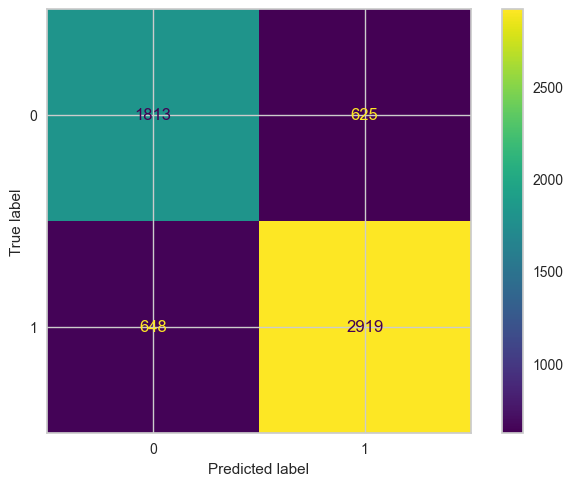

In [122]:
model = xgModel_grid_cv.best_estimator_
# model = XGBClassifier(n_estimators= 500,
#                       subsample=1,
#                       learning_rate= 0.1,                
#                       max_depth=5,
#                       colsample_bytree=1
#                       )

model.fit(X_train_cv, y_train)

y_pred_final = model.predict(X_test_cv)
y_train_pred_final = model.predict(X_train_cv)

print("XGBClassifier FINAL MODEL")
print("-------------------------")
eval(model, X_train_cv, X_test_cv)

In [123]:
xg_cv_grid_scores = {
    "xg_cv_grid_train": {
        "accuracy" : accuracy_score(y_train, y_train_pred_final),
        "f1_score" : f1_score(y_train, y_train_pred_final),
        "precision" : precision_score(y_train, y_train_pred_final),
        "recall" : recall_score(y_train, y_train_pred_final),
        "roc_auc" : roc_auc_score(y_train, y_train_pred_final)
        }, 

    "xg_cv_grid_test": {
        "accuracy" : accuracy_score(y_test, y_pred_final),
        "f1_score" : f1_score(y_test, y_pred_final),
        "precision" : precision_score(y_test, y_pred_final),
        "recall" : recall_score(y_test, y_pred_final),
        "roc_auc" : roc_auc_score(y_test, y_pred_final)
        }
               }

xg_cv_grid = round(pd.DataFrame(xg_cv_grid_scores),2)
xg_cv_grid

,xg_cv_grid_train,xg_cv_grid_test
accuracy,0.82,0.79
f1_score,0.85,0.82
precision,0.85,0.82
recall,0.85,0.82
roc_auc,0.81,0.78


In [124]:
xg_cv

,xg_cv_train,xg_cv_test
accuracy,0.77,0.75
f1_score,0.83,0.81
precision,0.74,0.72
recall,0.94,0.93
roc_auc,0.72,0.70


### Tf-idf Vectorization

#### Model Fitting 

XGBClassifier MODEL
-------------------------
Train_Set
              precision    recall  f1-score   support

           0       0.81      0.73      0.77      9750
           1       0.83      0.88      0.85     14269

    accuracy                           0.82     24019
   macro avg       0.82      0.81      0.81     24019
weighted avg       0.82      0.82      0.82     24019

Test_Set
              precision    recall  f1-score   support

           0       0.74      0.67      0.70      2438
           1       0.79      0.84      0.81      3567

    accuracy                           0.77      6005
   macro avg       0.76      0.75      0.76      6005
weighted avg       0.77      0.77      0.77      6005



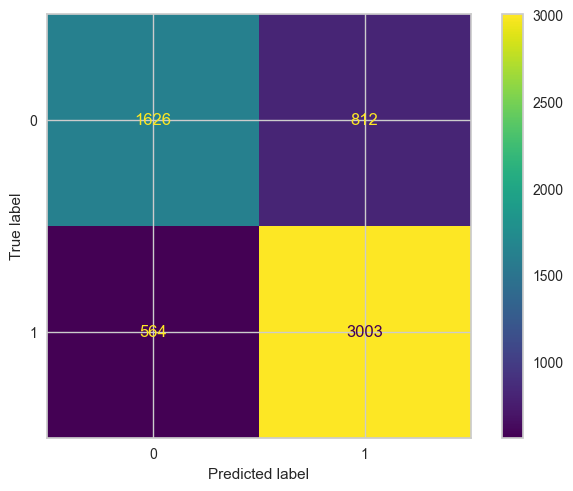

In [125]:
# import libraries
from sklearn.feature_extraction.text import TfidfVectorizer

# convert training data to tf-idf
tf_idf_vectorizer = TfidfVectorizer()
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)
    
# train model and generate predictions
xg = XGBClassifier()
xg.fit(X_train_tf_idf, y_train)
y_pred = xg.predict(X_test_tf_idf)
y_train_pred = xg.predict(X_train_tf_idf)

print("XGBClassifier MODEL")
print("-------------------------")
eval(xg, X_train_tf_idf, X_test_tf_idf)

In [126]:
xg_tf_scores = {
    "xg_tf_train": {
        "accuracy" : accuracy_score(y_train, y_train_pred),
        "f1_score" : f1_score(y_train, y_train_pred),
        "precision" : precision_score(y_train, y_train_pred),
        "recall" : recall_score(y_train, y_train_pred),
        "roc_auc" : roc_auc_score(y_train, y_train_pred)
        }, 

    "xg_tf_test": {
        "accuracy" : accuracy_score(y_test, y_pred),
        "f1_score" : f1_score(y_test, y_pred),
        "precision" : precision_score(y_test, y_pred),
        "recall" : recall_score(y_test, y_pred),
        "roc_auc" : roc_auc_score(y_test, y_pred)
        }
               }

xg_tf = round(pd.DataFrame(xg_tf_scores),2)
xg_tf

,xg_tf_train,xg_tf_test
accuracy,0.82,0.77
f1_score,0.85,0.81
precision,0.83,0.79
recall,0.88,0.84
roc_auc,0.81,0.75


#### Grid Search

In [127]:
%%time 

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

model = XGBClassifier()

params = {"n_estimators": [50, 100, 300, 500, 1000], 
              "max_depth": [3, 5, 6], 
              "learning_rate": [0.01, 0.1],
             "subsample": [0.5, 1], 
             "colsample_bytree": [0.5, 1]
             }

xgModel_grid_tf = RandomizedSearchCV(model, params, scoring= "f1", cv= 10, verbose = 2, n_jobs = -1, random_state=42).fit(X_train_tf_idf, y_train)

print('Best Accuracy Through Grid Search : {:.3f}'.format(xgModel_grid_tf.best_score_))
print('Best Parameters : {}\n'.format(xgModel_grid_tf.best_params_))
xgModel_grid_tf.best_estimator_

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best Accuracy Through Grid Search : 0.820
Best Parameters : {'subsample': 1, 'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.5}

CPU times: total: 1min 41s
Wall time: 11min 26s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

#### Final Model and Error Metrics

XGBClassifier FINAL MODEL
-------------------------
Train_Set
              precision    recall  f1-score   support

           0       0.83      0.76      0.79      9750
           1       0.85      0.89      0.87     14269

    accuracy                           0.84     24019
   macro avg       0.84      0.83      0.83     24019
weighted avg       0.84      0.84      0.84     24019

Test_Set
              precision    recall  f1-score   support

           0       0.76      0.68      0.72      2438
           1       0.80      0.85      0.82      3567

    accuracy                           0.78      6005
   macro avg       0.78      0.77      0.77      6005
weighted avg       0.78      0.78      0.78      6005



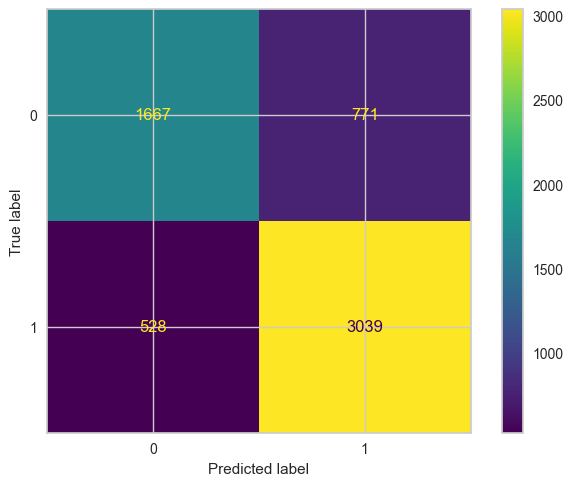

In [128]:
model = xgModel_grid_tf.best_estimator_
# model = XGBClassifier(n_estimators= 500,
#                       subsample=1,
#                       learning_rate= 0.1,                
#                       max_depth=5,
#                       colsample_bytree=0.5
#                       )

model.fit(X_train_tf_idf, y_train)

y_pred_final = model.predict(X_test_tf_idf)
y_train_pred_final = model.predict(X_train_tf_idf)

print("XGBClassifier FINAL MODEL")
print("-------------------------")
eval(model, X_train_tf_idf, X_test_tf_idf)

In [129]:
xg_tf_grid_scores = {
    "xg_tf_grid_train": {
        "accuracy" : accuracy_score(y_train, y_train_pred_final),
        "f1_score" : f1_score(y_train, y_train_pred_final),
        "precision" : precision_score(y_train, y_train_pred_final),
        "recall" : recall_score(y_train, y_train_pred_final),
        "roc_auc" : roc_auc_score(y_train, y_train_pred_final)
        }, 

    "xg_tf_grid_test": {
        "accuracy" : accuracy_score(y_test, y_pred_final),
        "f1_score" : f1_score(y_test, y_pred_final),
        "precision" : precision_score(y_test, y_pred_final),
        "recall" : recall_score(y_test, y_pred_final),
        "roc_auc" : roc_auc_score(y_test, y_pred_final)
        }
               }

xg_tf_grid = round(pd.DataFrame(xg_tf_grid_scores),2)
xg_tf_grid

,xg_tf_grid_train,xg_tf_grid_test
accuracy,0.84,0.78
f1_score,0.87,0.82
precision,0.85,0.80
recall,0.89,0.85
roc_auc,0.83,0.77


In [130]:
xg_tf

,xg_tf_train,xg_tf_test
accuracy,0.82,0.77
f1_score,0.85,0.81
precision,0.83,0.79
recall,0.88,0.84
roc_auc,0.81,0.75


## Evulation All Models

In [131]:
evu_model = pd.concat([nb_cv_grid, nb_tf_grid, log_cv_grid, log_tf_grid, rf_cv_grid, rf_tf_grid, xg_cv_grid, xg_tf_grid], axis= 1).T
evu_model

,accuracy,f1_score,precision,recall,roc_auc
nb_cv_grid_train,0.83,0.87,0.81,0.93,0.81
nb_cv_grid_test,0.81,0.85,0.79,0.91,0.78
nb_tf_grid_train,0.88,0.90,0.88,0.92,0.87
nb_tf_grid_test,0.82,0.86,0.83,0.89,0.81
log_cv_grid_train,0.83,0.87,0.82,0.92,0.81
log_cv_grid_test,0.80,0.84,0.79,0.90,0.78
log_tf_grid_train,0.99,0.99,0.99,0.99,0.99
log_tf_grid_test,0.79,0.83,0.82,0.83,0.78
rf_cv_grid_train,0.99,0.99,1.00,0.99,0.99
rf_cv_grid_test,0.81,0.84,0.82,0.87,0.79


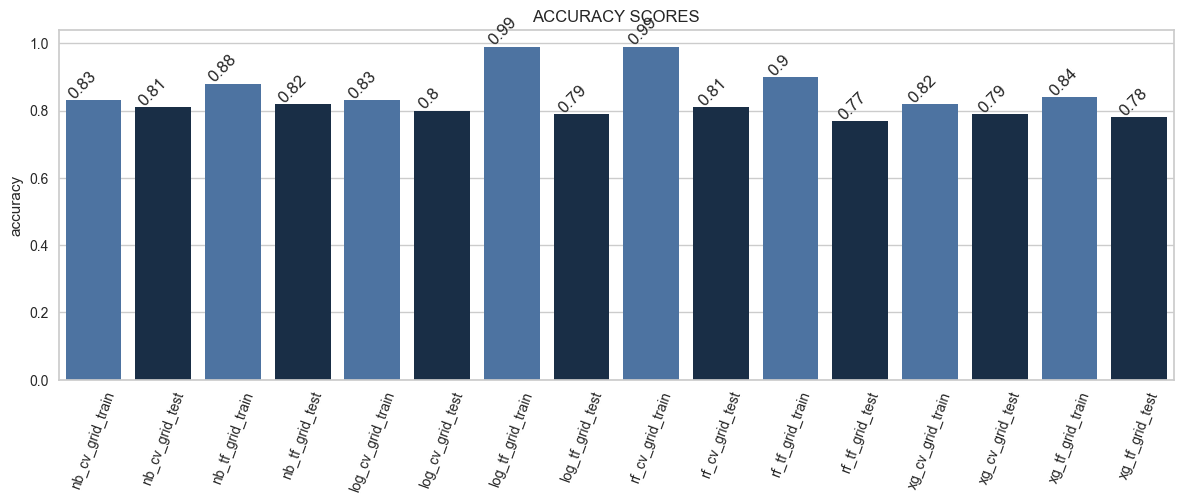

In [132]:
# Accuracy Scores

color=["#3F72AF","#112D4E"]
plt.figure(figsize= (12,5))
ax = sns.barplot(y=evu_model["accuracy"], x=evu_model.index, palette=color)
plt.xticks(rotation=70)
plt.tight_layout()
plt.title("ACCURACY SCORES")
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005), rotation=45)

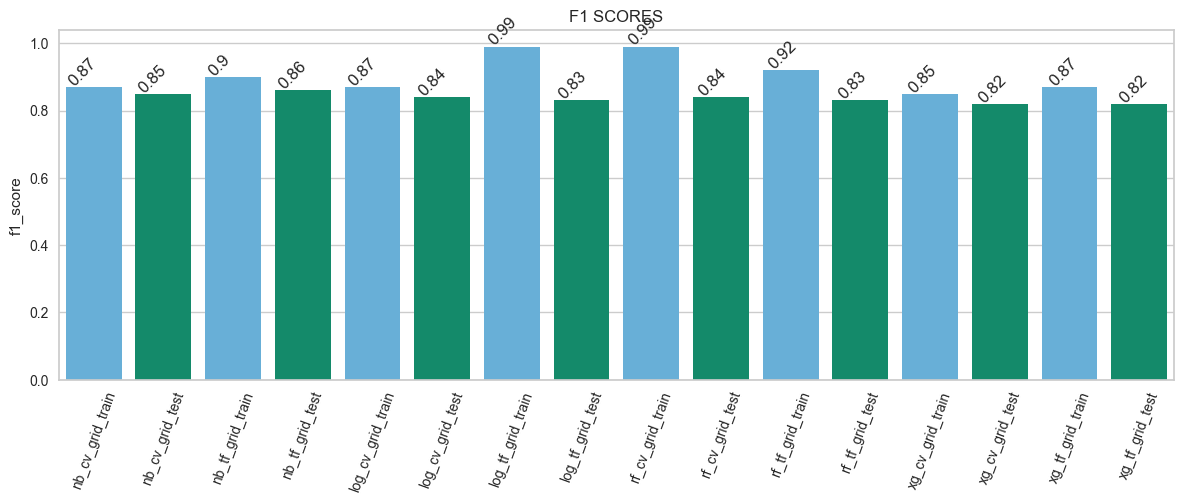

In [133]:
# F1 Scores

color=["#56B4E9","#009E73"]
plt.figure(figsize= (12,5))
ax = sns.barplot(y=evu_model["f1_score"], x=evu_model.index, palette=color)
plt.xticks(rotation=70)
plt.tight_layout()
plt.title("F1 SCORES")
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005), rotation=45)

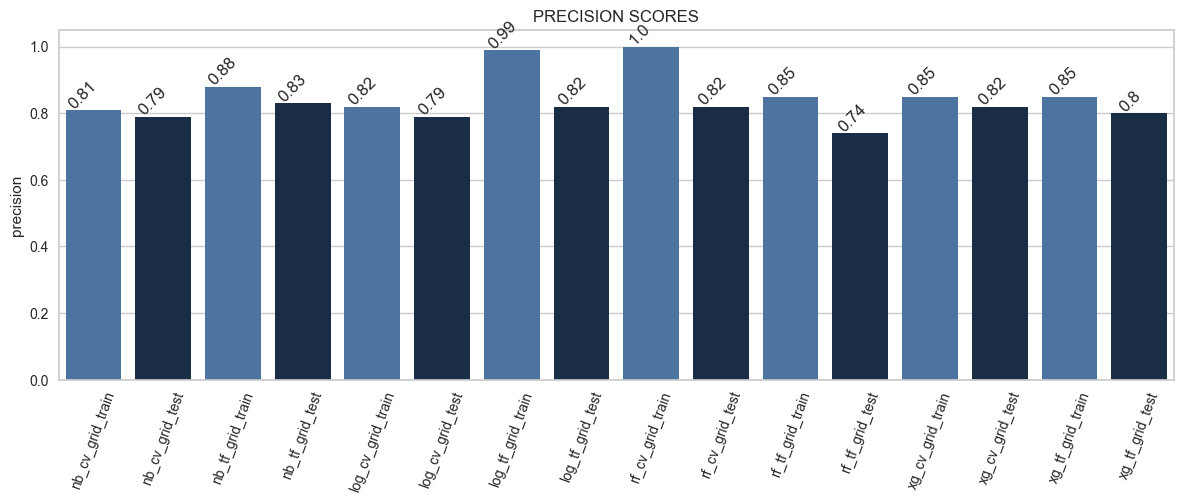

In [134]:
# Precision Scores

color=["#3F72AF","#112D4E"]
plt.figure(figsize= (12,5))
ax = sns.barplot(y=evu_model["precision"], x=evu_model.index, palette=color)
plt.xticks(rotation=70)
plt.tight_layout()
plt.title("PRECISION SCORES")
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005), rotation=45)

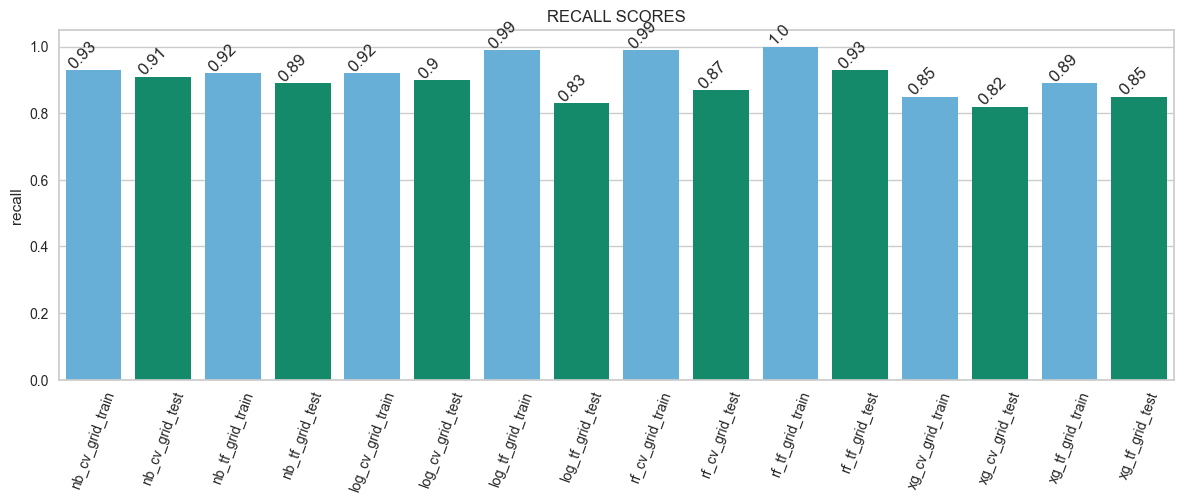

In [135]:
# Recall Scores

color=["#56B4E9","#009E73"]
plt.figure(figsize= (12,5))
ax = sns.barplot(y=evu_model["recall"], x=evu_model.index, palette=color)
plt.xticks(rotation=70)
plt.tight_layout()
plt.title("RECALL SCORES")
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005), rotation=45)

In [136]:
# Overfittingin en az ve F1 skorun en yüksek olduğu; TfidfVectorizer kullanılmış MultinomialNB modelinin en iyi değerleri verdiğini görüyoruz.

In [137]:
time_taken = time.time() - start_time
print('Time Taken:', time.strftime("%H:%M:%S",time.gmtime(time_taken)))

Time Taken: 02:50:25


## Saving the Best Model

In [138]:
# The best model
best_model = nbModel_grid_tf.best_estimator_
best_model.fit(X_train_tf_idf, y_train)

MultinomialNB(alpha=1, class_prior=[0.1, 0.1], fit_prior=False)

In [139]:
import joblib
joblib.dump(best_model, open("best_model.pkl", "wb"))
loaded_model = joblib.load(open('best_model.pkl',"rb"))

## Determining Optimal Threshold For (nbModel_grid_tf)

##### Optimal Threshold for ROC Curve

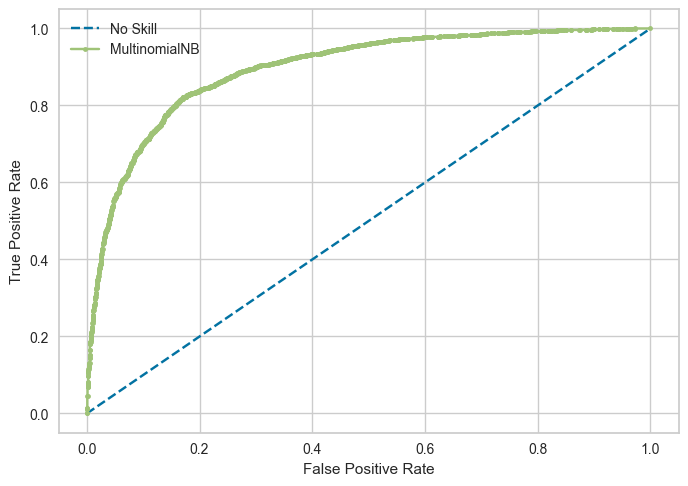

In [140]:
# fit a model
model = best_model
model.fit(X_train_tf_idf, y_train)
# predict probabilities
yhat = model.predict_proba(X_test_tf_idf)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, yhat)
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='MultinomialNB')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

Best Threshold=0.586404, G-Mean=0.825


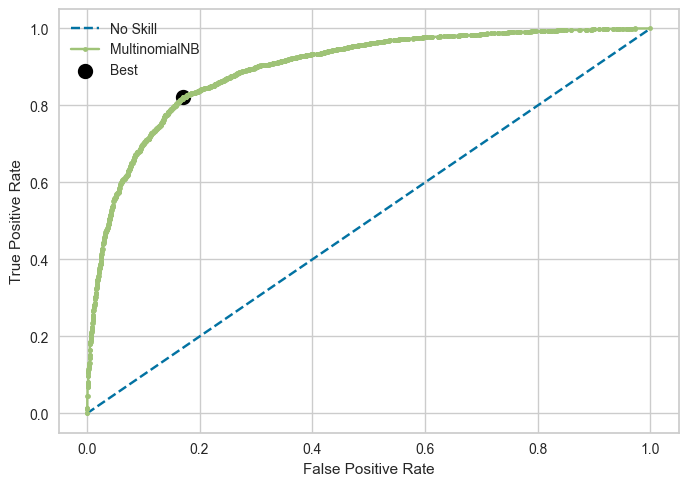

In [141]:
# fit a model
model = best_model
model.fit(X_train_tf_idf, y_train)
# predict probabilities
yhat = model.predict_proba(X_test_tf_idf,)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='MultinomialNB')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', linewidths=4, label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [142]:
# It turns out there is a much faster way to get the same result, called the Youden’s J statistic.

# fit a model
model = best_model
model.fit(X_train_tf_idf, y_train)
# predict probabilities
yhat = model.predict_proba(X_test_tf_idf,)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, yhat)
# get the best threshold
J = tpr - fpr
ix = np.argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))

Best Threshold=0.586404


##### Optimal Threshold for Precision-Recall Curve

In [143]:
# calculate pr-curve
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, yhat)

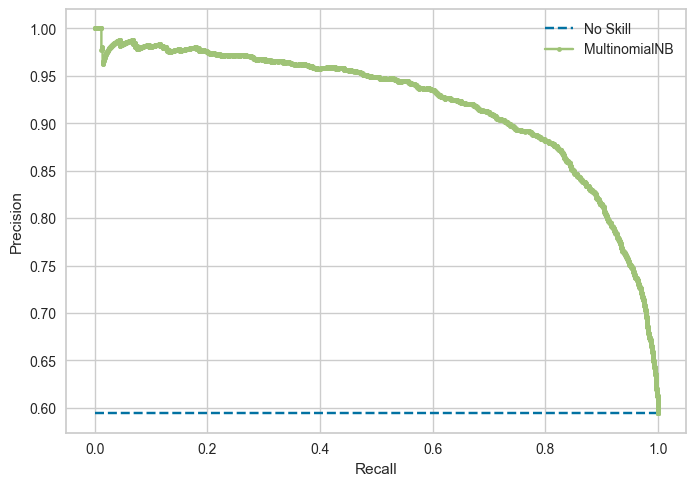

In [144]:
# fit a model
model = best_model
model.fit(X_train_tf_idf, y_train)
# predict probabilities
yhat = model.predict_proba(X_test_tf_idf)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]
# calculate pr-curve
precision, recall, thresholds = precision_recall_curve(y_test, yhat)
# plot the roc curve for the model
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
plt.plot(recall, precision, marker='.', label='MultinomialNB')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
# show the plot
plt.show()

Best Threshold=0.494964, F-Score=0.856


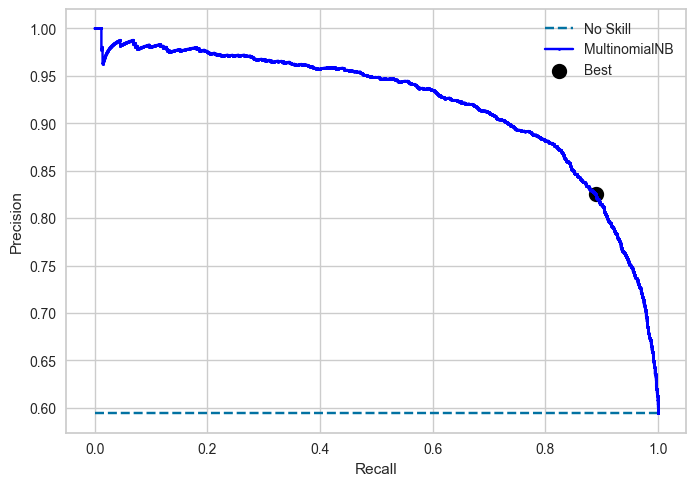

In [145]:
# fit a model
model = best_model
model.fit(X_train_tf_idf, y_train)
# predict probabilities
yhat = model.predict_proba(X_test_tf_idf)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]
# calculate roc curves
precision, recall, thresholds = precision_recall_curve(y_test, yhat)
# convert to f score
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
# plot the roc curve for the model
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
plt.plot(recall, precision, marker='.', label='MultinomialNB', color='blue', markersize=4,)
plt.scatter(recall[ix], precision[ix], marker='o', color='black', linewidths= 4, label='Best')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
# show the plot
plt.show()

##### Optimal Threshold Tuning

In [146]:
# fit a model
model = best_model
model.fit(X_train_tf_idf, y_train)
# predict labels
yhat = model.predict(X_test_tf_idf)
# evaluate the model
score = f1_score(y_test, yhat)
print('F-Score: %.5f' % score)

F-Score: 0.85563


In [148]:
# fit a model
model = best_model
model.fit(X_train_tf_idf, y_train)
# predict probabilities
yhat = model.predict_proba(X_test_tf_idf)
# keep probabilities for the positive outcome only
probs = yhat[:, 1]
# define thresholds
thresholds = np.arange(0, 1, 0.001)
# apply threshold to positive probabilities to create labels
def to_labels(pos_probs, threshold):
	return (pos_probs >= threshold).astype('int')
# evaluate each threshold
scores = [f1_score(y_test, to_labels(probs, t)) for t in thresholds]
# get best threshold
ix = np.argmax(scores)
print('Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))

Threshold=0.495, F-Score=0.85595


### Implementation Of Determined Optimum Threshold

In [149]:
# Implementing model

model = best_model
model.fit(X_train_tf_idf, y_train)


y_pred = model.predict(X_test_tf_idf)
y_train_pred = model.predict(X_train_tf_idf)

print('Predicted Values from Classifier:', y_pred)
print('Actual Output is:', list(y_test))
print('Accuracy of the model is:', round(model.score(X_test_tf_idf, y_test),3))
print('F1 Score of the model is:', round(f1_score(y_test, y_pred),3))

# predict probabilities
y_pred_proba = model.predict_proba(X_test_tf_idf)
y_pred_proba[:,1]
print("--------------------------------------------")
print('Predicted Probability Values from Classifier::', (y_pred_proba[:,1]))

Predicted Values from Classifier: [0 1 0 ... 1 0 1]
Actual Output is: [0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,

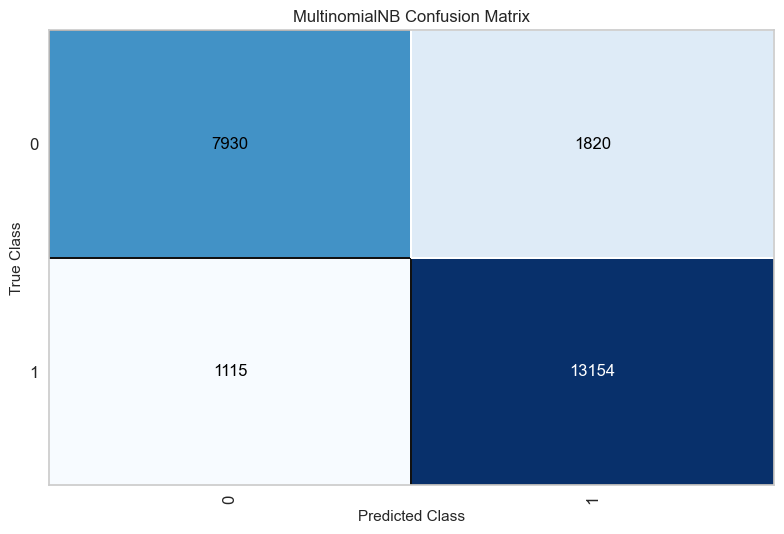

In [150]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(model, cmap='Blues')
cm.score(X_train_tf_idf, y_train)
cm.show();

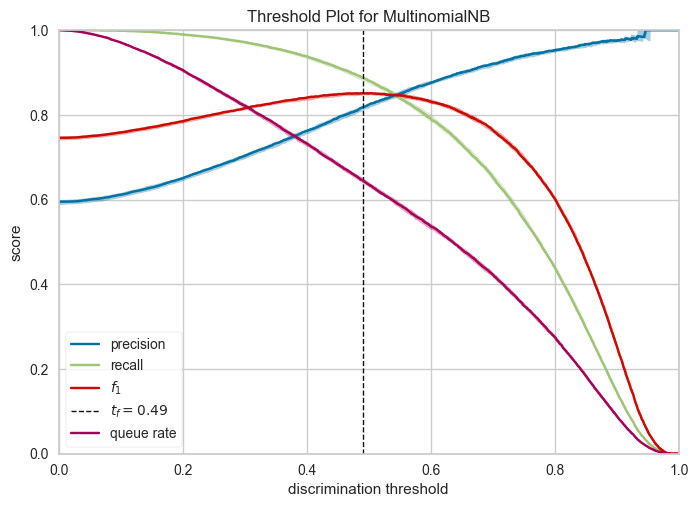

In [151]:
from yellowbrick.classifier import DiscriminationThreshold

visualizer = DiscriminationThreshold(model, quantiles=np.array([0.25, 0.5, 0.75]))

visualizer.fit(X_train_tf_idf, y_train)
visualizer.show(); 

In [152]:
# ! pip install sklego
from sklego.meta import Thresholder

best_threshold = visualizer.thresholds_[visualizer.cv_scores_[visualizer.argmax].argmax()]
# best_threshold = 0.8
pipe_threshold = Thresholder(model, best_threshold, refit=False)
pipe_threshold.fit(X_train_tf_idf, y_train)

Thresholder(model=MultinomialNB(alpha=1, class_prior=[0.1, 0.1],
                                fit_prior=False),
            threshold=0.4913611462284029)

In [153]:
y_pred_pipe = pipe_threshold.predict(X_test_tf_idf)
pipe_threshold = pipe_threshold.predict(X_train_tf_idf)

print("For y_pred_PIPE:")
print("accuracy_score : ", round(accuracy_score(y_test, y_pred_pipe),3))
print("f1_score       : ", round(f1_score(y_test, y_pred_pipe),3))
print("precision_score: ", round(precision_score(y_test, y_pred_pipe),3))
print("recall_score   : ", round(recall_score(y_test, y_pred_pipe),3))

print("-----------------------------")
print("For y_pred:")
print("accuracy_score : ", round(accuracy_score(y_test, y_pred),3))
print("f1_score       : ", round(f1_score(y_test, y_pred),3))
print("precision_score: ", round(precision_score(y_test, y_pred),3))
print("recall_score   : ", round(recall_score(y_test, y_pred),3))

For y_pred_PIPE:
accuracy_score :  0.82
f1_score       :  0.855
precision_score:  0.822
recall_score   :  0.89
-----------------------------
For y_pred:
accuracy_score :  0.822
f1_score       :  0.856
precision_score:  0.828
recall_score   :  0.886


For y_pred_PIPE:


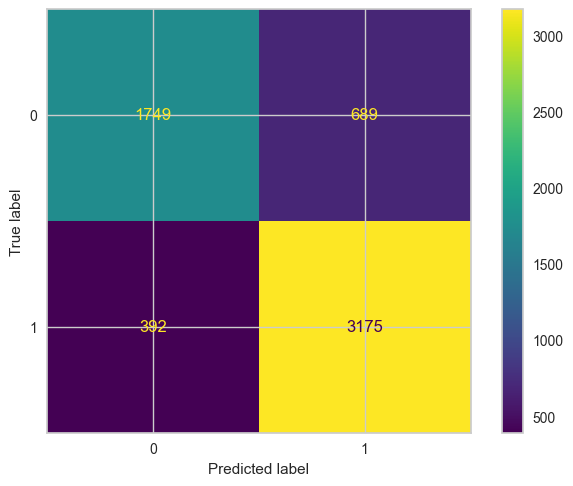

In [154]:
# For y_pred_pipe
print("For y_pred_PIPE:")
cm = confusion_matrix(y_test, y_pred_pipe, labels=model.classes_)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot()

For y_pred:


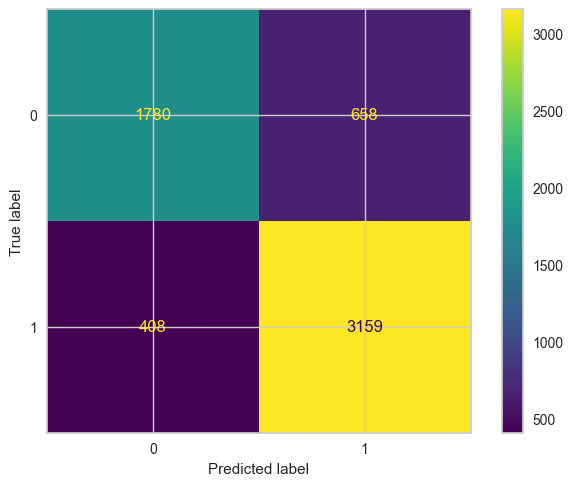

In [155]:
# For y_pred
print("For y_pred:")
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot()

### Prediction with pipeline (for new tweets)


In [156]:
from sklearn.pipeline import Pipeline

pipe_thr = Pipeline([('tf_idf',TfidfVectorizer()),('threshold_model', Thresholder(model, best_threshold, refit=False))])
pipe_thr.fit(X_train, y_train)

Pipeline(steps=[('tf_idf', TfidfVectorizer()),
                ('threshold_model',
                 Thresholder(model=MultinomialNB(alpha=1,
                                                 class_prior=[0.1, 0.1],
                                                 fit_prior=False),
                             threshold=0.4913611462284029))])

In [157]:
pipe_original = Pipeline([('tf_idf',TfidfVectorizer()),('model', model)])
pipe_original.fit(X_train, y_train)

Pipeline(steps=[('tf_idf', TfidfVectorizer()),
                ('model',
                 MultinomialNB(alpha=1, class_prior=[0.1, 0.1],
                               fit_prior=False))])

In [158]:
# Tweet Category: Business

tweet = "Pending home sales squeezed out tiny gain in February, as mortgage rates jumped"
tweet = pd.Series(tweet).apply(cleaning_till_tokenize)
print("Tweet Category: Business")
print("-----------------------------")
print("Thresholded Model Prediction: ", pipe_thr.predict(tweet), ("Business" if pipe_thr.predict(tweet)[0] == 1 else "Not Business"))
print("Original Model Prediction   : ", pipe_original.predict(tweet), ("Business" if pipe_original.predict(tweet)[0] == 1 else "Not Business"))

Tweet Category: Business
-----------------------------
Thresholded Model Prediction:  [1] Business
Original Model Prediction   :  [1] Business


In [159]:
# Tweet Category: Business

tweet = "Macy’s CEO Jeff Gennette, who has led the company’s turnaround effort, will retire next year"
tweet = pd.Series(tweet).apply(cleaning_till_tokenize)
print("Tweet Category: Business")
print("-----------------------------")
print("Thresholded Model Prediction: ", pipe_thr.predict(tweet), ("Business" if pipe_thr.predict(tweet)[0] == 1 else "Not Business"))
print("Original Model Prediction   : ", pipe_original.predict(tweet), ("Business" if pipe_original.predict(tweet)[0] == 1 else "Not Business"))

Tweet Category: Business
-----------------------------
Thresholded Model Prediction:  [1] Business
Original Model Prediction   :  [1] Business


In [160]:
# Tweet Category: Academy

tweet = "CNN added a simulation to its academy training program for the first time over five days last week."
tweet = pd.Series(tweet).apply(cleaning_till_tokenize)
print("Tweet Category: Academy")
print("-----------------------------")
print("Thresholded Model Prediction: ", pipe_thr.predict(tweet), ("Business" if pipe_thr.predict(tweet)[0] == 1 else "Not Business"))
print("Original Model Prediction   : ", pipe_original.predict(tweet), ("Business" if pipe_original.predict(tweet)[0] == 1 else "Not Business"))


Tweet Category: Academy
-----------------------------
Thresholded Model Prediction:  [0] Not Business
Original Model Prediction   :  [0] Not Business


In [161]:
# Tweet Category: Economy

tweet = "European Central Bank hikes rates despite market mayhem, pledges support if needed"
tweet = pd.Series(tweet).apply(cleaning_till_tokenize)
print("Tweet Category: Economy")
print("-----------------------------")
print("Thresholded Model Prediction: ", pipe_thr.predict(tweet), ("Business" if pipe_thr.predict(tweet)[0] == 1 else "Not Business"))
print("Original Model Prediction   : ", pipe_original.predict(tweet), ("Business" if pipe_original.predict(tweet)[0] == 1 else "Not Business"))

Tweet Category: Economy
-----------------------------
Thresholded Model Prediction:  [1] Business
Original Model Prediction   :  [1] Business


In [162]:
# Tweet Category: None

tweet = "don't enjoy flight"
tweet = pd.Series(tweet).apply(cleaning_till_tokenize)
print("Tweet Category: None")
print("-----------------------------")
print("Thresholded Model Prediction: ", pipe_thr.predict(tweet), ("Business" if pipe_thr.predict(tweet)[0] == 1 else "Not Business"))
print("Original Model Prediction   : ", pipe_original.predict(tweet), ("Business" if pipe_original.predict(tweet)[0] == 1 else "Not Business"))

Tweet Category: None
-----------------------------
Thresholded Model Prediction:  [1] Business
Original Model Prediction   :  [1] Business


In [163]:
# Tweet Category: None

tweet = "I love NLP"
tweet = pd.Series(tweet).apply(cleaning_till_tokenize)
print("Tweet Category: None")
print("-----------------------------")
print("Thresholded Model Prediction: ", pipe_thr.predict(tweet), ("Business" if pipe_thr.predict(tweet)[0] == 1 else "Not Business"))
print("Original Model Prediction   : ", pipe_original.predict(tweet), ("Business" if pipe_original.predict(tweet)[0] == 1 else "Not Business"))

Tweet Category: None
-----------------------------
Thresholded Model Prediction:  [1] Business
Original Model Prediction   :  [1] Business


## Determining Optimal Threshold For (xgModel_grid_cv)

##### Optimal Threshold for ROC Curve

In [164]:
best_model = xgModel_grid_cv.best_estimator_
# model = best_model

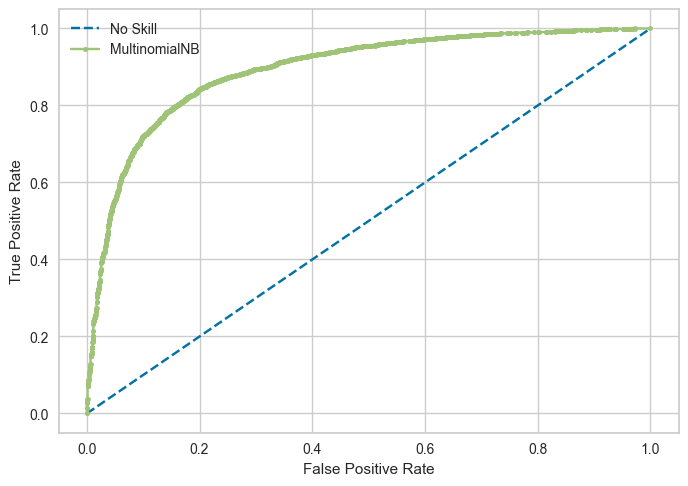

In [165]:
# fit a model
model = best_model
model.fit(X_train_cv, y_train)
# predict probabilities
yhat = model.predict_proba(X_test_cv)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, yhat)
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='MultinomialNB')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

Best Threshold=0.640229, G-Mean=0.821


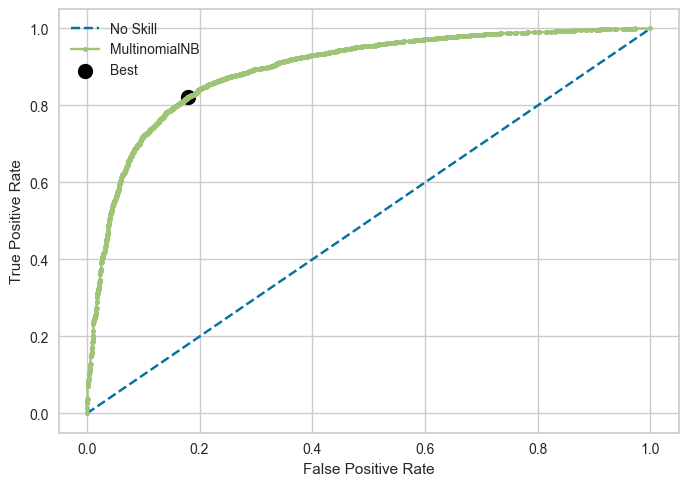

In [166]:
# fit a model
model = best_model
model.fit(X_train_cv, y_train)
# predict probabilities
yhat = model.predict_proba(X_test_cv,)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='MultinomialNB')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', linewidths=4, label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [167]:
# It turns out there is a much faster way to get the same result, called the Youden’s J statistic.

# fit a model
model = best_model
model.fit(X_train_cv, y_train)
# predict probabilities
yhat = model.predict_proba(X_test_cv,)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, yhat)
# get the best threshold
J = tpr - fpr
ix = np.argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))

Best Threshold=0.563187


##### Optimal Threshold for Precision-Recall Curve

In [168]:
# calculate pr-curve
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, yhat)

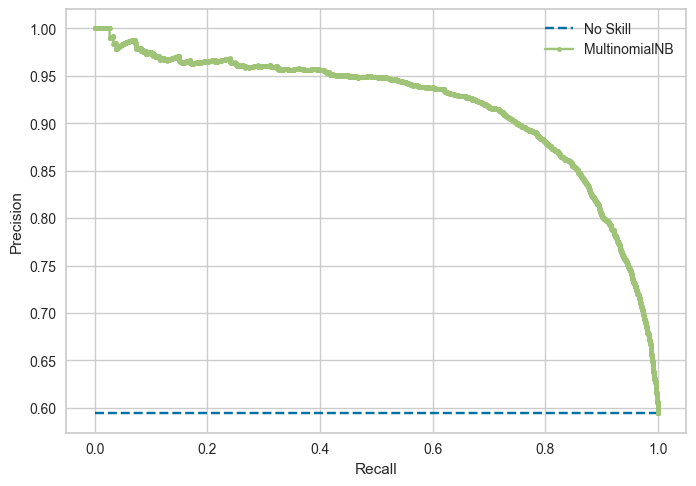

In [169]:
# fit a model
model = best_model
model.fit(X_train_cv, y_train)
# predict probabilities
yhat = model.predict_proba(X_test_cv)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]
# calculate pr-curve
precision, recall, thresholds = precision_recall_curve(y_test, yhat)
# plot the roc curve for the model
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
plt.plot(recall, precision, marker='.', label='MultinomialNB')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
# show the plot
plt.show()

Best Threshold=0.416100, F-Score=0.855


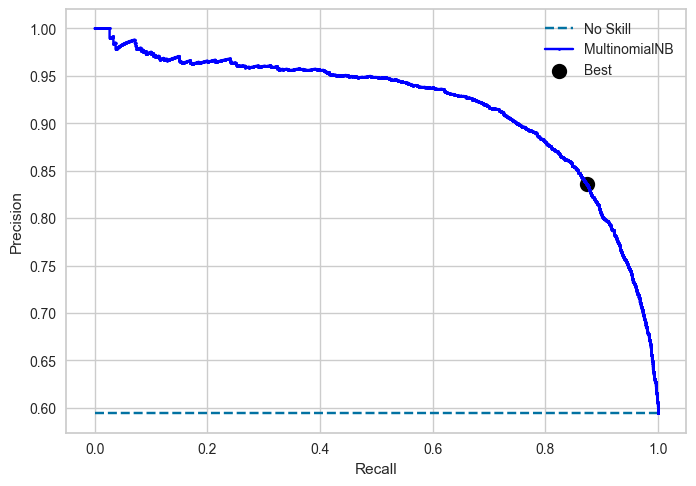

In [170]:
# fit a model
model = best_model
model.fit(X_train_cv, y_train)
# predict probabilities
yhat = model.predict_proba(X_test_cv)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]
# calculate roc curves
precision, recall, thresholds = precision_recall_curve(y_test, yhat)
# convert to f score
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
# plot the roc curve for the model
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
plt.plot(recall, precision, marker='.', label='MultinomialNB', color='blue', markersize=4,)
plt.scatter(recall[ix], precision[ix], marker='o', color='black', linewidths= 4, label='Best')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
# show the plot
plt.show()

##### Optimal Threshold Tuning

In [171]:
# fit a model
model = best_model
model.fit(X_train_cv, y_train)
# predict labels
yhat = model.predict(X_test_cv)
# evaluate the model
score = f1_score(y_test, yhat)
print('F-Score: %.5f' % score)

F-Score: 0.85320


In [172]:
# fit a model
model = best_model
model.fit(X_train_cv, y_train)
# predict probabilities
yhat = model.predict_proba(X_test_cv)
# keep probabilities for the positive outcome only
probs = yhat[:, 1]
# define thresholds
thresholds = np.arange(0, 1, 0.001)
# apply threshold to positive probabilities to create labels
def to_labels(pos_probs, threshold):
	return (pos_probs >= threshold).astype('int')
# evaluate each threshold
scores = [f1_score(y_test, to_labels(probs, t)) for t in thresholds]
# get best threshold
ix = np.argmax(scores)
print('Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))

Threshold=0.416, F-Score=0.85464


### Implementation Of Determined Optimum Threshold

In [173]:
# Implementing model

model = best_model
model.fit(X_train_cv, y_train)


y_pred = model.predict(X_test_cv)
y_train_pred = model.predict(X_train_cv)

print('Predicted Values from Classifier:', y_pred)
print('Actual Output is:', list(y_test))
print('Accuracy of the model is:', round(model.score(X_test_cv, y_test),3))
print('F1 Score of the model is:', round(f1_score(y_test, y_pred),3))

# predict probabilities
y_pred_proba = model.predict_proba(X_test_cv)
y_pred_proba[:,1]
print("--------------------------------------------")
print('Predicted Probability Values from Classifier::', (y_pred_proba[:,1]))

Predicted Values from Classifier: [0 1 0 ... 1 0 1]
Actual Output is: [0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,

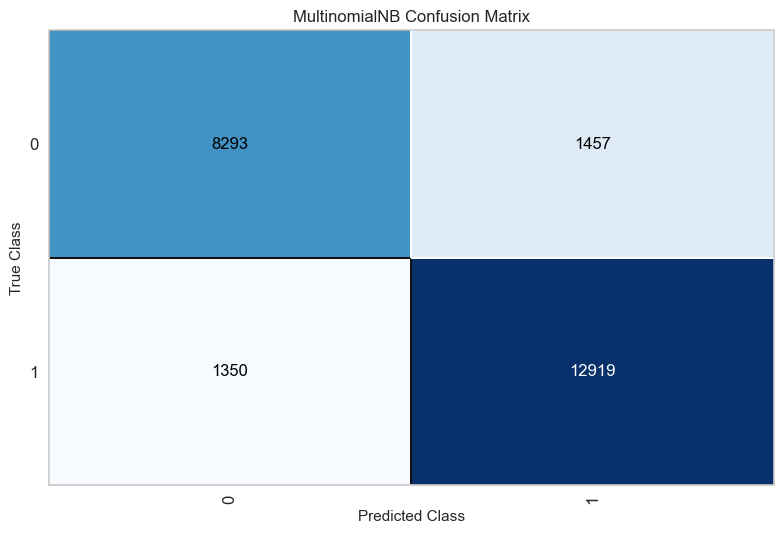

In [174]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(model, cmap='Blues')
cm.score(X_train_cv, y_train)
cm.show();

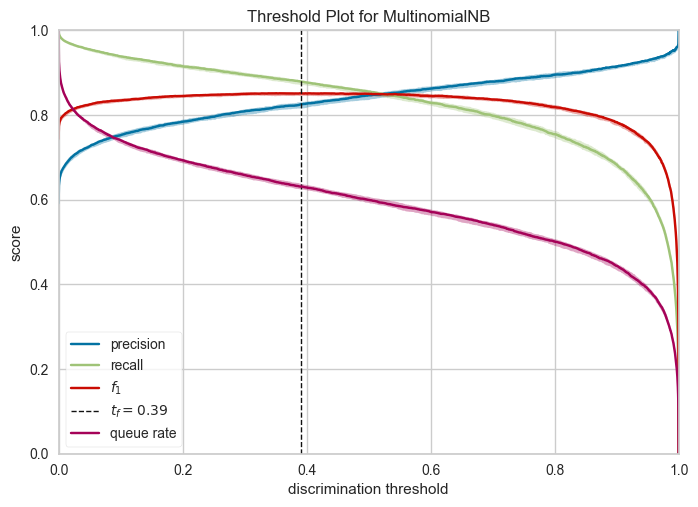

In [175]:
from yellowbrick.classifier import DiscriminationThreshold

visualizer = DiscriminationThreshold(model, quantiles=np.array([0.25, 0.5, 0.75]))

visualizer.fit(X_train_cv, y_train)
visualizer.show(); 

In [176]:
# ! pip install sklego
from sklego.meta import Thresholder

best_threshold = visualizer.thresholds_[visualizer.cv_scores_[visualizer.argmax].argmax()]
# best_threshold = 0.8
pipe_threshold = Thresholder(model, best_threshold, refit=False)
pipe_threshold.fit(X_train_cv, y_train)

Thresholder(model=MultinomialNB(alpha=1, class_prior=[0.1, 0.1],
                                fit_prior=False),
            threshold=0.3916526138279932)

In [177]:
y_pred_pipe = pipe_threshold.predict(X_test_cv)
pipe_threshold = pipe_threshold.predict(X_train_cv)

print("For y_pred_PIPE:")
print("accuracy_score : ", round(accuracy_score(y_test, y_pred_pipe),3))
print("f1_score       : ", round(f1_score(y_test, y_pred_pipe),3))
print("precision_score: ", round(precision_score(y_test, y_pred_pipe),3))
print("recall_score   : ", round(recall_score(y_test, y_pred_pipe),3))

print("-----------------------------")
print("For y_pred:")
print("accuracy_score : ", round(accuracy_score(y_test, y_pred),3))
print("f1_score       : ", round(f1_score(y_test, y_pred),3))
print("precision_score: ", round(precision_score(y_test, y_pred),3))
print("recall_score   : ", round(recall_score(y_test, y_pred),3))

For y_pred_PIPE:
accuracy_score :  0.82
f1_score       :  0.853
precision_score:  0.829
recall_score   :  0.878
-----------------------------
For y_pred:
accuracy_score :  0.825
f1_score       :  0.853
precision_score:  0.849
recall_score   :  0.858


For y_pred_PIPE:


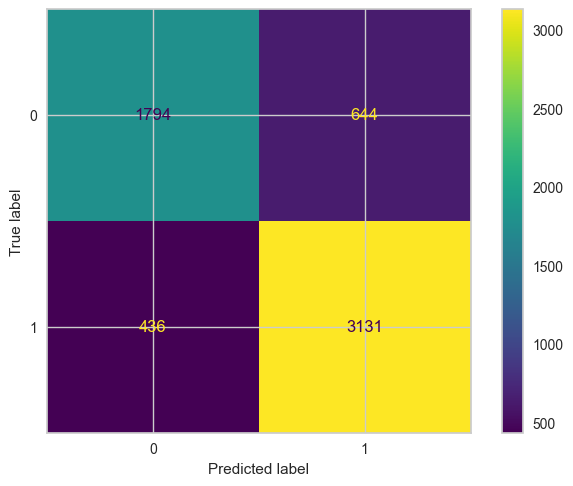

In [178]:
# For y_pred_pipe
print("For y_pred_PIPE:")
cm = confusion_matrix(y_test, y_pred_pipe, labels=model.classes_)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot()

For y_pred:


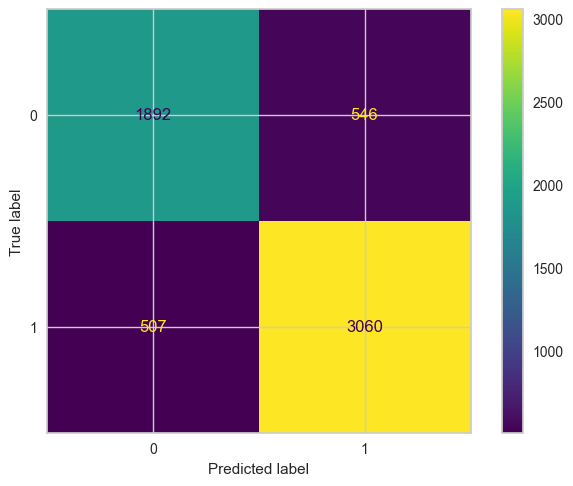

In [179]:
# For y_pred
print("For y_pred:")
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot()

### Prediction with pipeline (for new tweets)


In [183]:
from sklearn.pipeline import Pipeline

pipe_thr = Pipeline([('cv',CountVectorizer()),('threshold_model', Thresholder(model, best_threshold, refit=False))])
pipe_thr.fit(X_train, y_train)

Pipeline(steps=[('cv', CountVectorizer()),
                ('threshold_model',
                 Thresholder(model=MultinomialNB(alpha=1,
                                                 class_prior=[0.1, 0.1],
                                                 fit_prior=False),
                             threshold=0.3916526138279932))])

In [181]:
pipe_original = Pipeline([('cv',CountVectorizer()),('model', model)])
pipe_original.fit(X_train, y_train)

Pipeline(steps=[('cv', CountVectorizer()),
                ('model',
                 MultinomialNB(alpha=1, class_prior=[0.1, 0.1],
                               fit_prior=False))])

In [184]:
# Tweet Category: Business

tweet = "Pending home sales squeezed out tiny gain in February, as mortgage rates jumped"
tweet = pd.Series(tweet).apply(cleaning_till_tokenize)
print("Tweet Category: Business")
print("-----------------------------")
print("Thresholded Model Prediction: ", pipe_thr.predict(tweet), ("Business" if pipe_thr.predict(tweet)[0] == 1 else "Not Business"))
print("Original Model Prediction   : ", pipe_original.predict(tweet), ("Business" if pipe_original.predict(tweet)[0] == 1 else "Not Business"))

Tweet Category: Business
-----------------------------
Thresholded Model Prediction:  [1] Business
Original Model Prediction   :  [1] Business


In [185]:
# Tweet Category: Business

tweet = "Macy’s CEO Jeff Gennette, who has led the company’s turnaround effort, will retire next year"
tweet = pd.Series(tweet).apply(cleaning_till_tokenize)
print("Tweet Category: Business")
print("-----------------------------")
print("Thresholded Model Prediction: ", pipe_thr.predict(tweet), ("Business" if pipe_thr.predict(tweet)[0] == 1 else "Not Business"))
print("Original Model Prediction   : ", pipe_original.predict(tweet), ("Business" if pipe_original.predict(tweet)[0] == 1 else "Not Business"))

Tweet Category: Business
-----------------------------
Thresholded Model Prediction:  [1] Business
Original Model Prediction   :  [1] Business


In [186]:
# Tweet Category: Academy

tweet = "CNN added a simulation to its academy training program for the first time over five days last week."
tweet = pd.Series(tweet).apply(cleaning_till_tokenize)
print("Tweet Category: Academy")
print("-----------------------------")
print("Thresholded Model Prediction: ", pipe_thr.predict(tweet), ("Business" if pipe_thr.predict(tweet)[0] == 1 else "Not Business"))
print("Original Model Prediction   : ", pipe_original.predict(tweet), ("Business" if pipe_original.predict(tweet)[0] == 1 else "Not Business"))


Tweet Category: Academy
-----------------------------
Thresholded Model Prediction:  [0] Not Business
Original Model Prediction   :  [0] Not Business


In [187]:
# Tweet Category: Economy

tweet = "European Central Bank hikes rates despite market mayhem, pledges support if needed"
tweet = pd.Series(tweet).apply(cleaning_till_tokenize)
print("Tweet Category: Economy")
print("-----------------------------")
print("Thresholded Model Prediction: ", pipe_thr.predict(tweet), ("Business" if pipe_thr.predict(tweet)[0] == 1 else "Not Business"))
print("Original Model Prediction   : ", pipe_original.predict(tweet), ("Business" if pipe_original.predict(tweet)[0] == 1 else "Not Business"))

Tweet Category: Economy
-----------------------------
Thresholded Model Prediction:  [1] Business
Original Model Prediction   :  [1] Business


In [188]:
# Tweet Category: None

tweet = "don't enjoy flight"
tweet = pd.Series(tweet).apply(cleaning_till_tokenize)
print("Tweet Category: None")
print("-----------------------------")
print("Thresholded Model Prediction: ", pipe_thr.predict(tweet), ("Business" if pipe_thr.predict(tweet)[0] == 1 else "Not Business"))
print("Original Model Prediction   : ", pipe_original.predict(tweet), ("Business" if pipe_original.predict(tweet)[0] == 1 else "Not Business"))

Tweet Category: None
-----------------------------
Thresholded Model Prediction:  [1] Business
Original Model Prediction   :  [1] Business


In [189]:
# Tweet Category: None

tweet = "I love NLP"
tweet = pd.Series(tweet).apply(cleaning_till_tokenize)
print("Tweet Category: None")
print("-----------------------------")
print("Thresholded Model Prediction: ", pipe_thr.predict(tweet), ("Business" if pipe_thr.predict(tweet)[0] == 1 else "Not Business"))
print("Original Model Prediction   : ", pipe_original.predict(tweet), ("Business" if pipe_original.predict(tweet)[0] == 1 else "Not Business"))

Tweet Category: None
-----------------------------
Thresholded Model Prediction:  [1] Business
Original Model Prediction   :  [0] Not Business
